In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

/Users/telmomm/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## CARGA DE DATOS Y PRE-PROCESAMIENTO



### Lectura de la BBDD con las características filtradas por el especialista en cardiología

In [2]:
df_original = pd.read_excel(
    'bbdd/Base Datos con categorias agrupadas.xlsx',
    header=1,
    decimal=',',
    )
df = df_original.copy()
num_var = ['Edad',
           'IMC',
           'Htopre', 
           'Leucograma',
           'Creatininapre',
           'Proteinasatotales',
           'PCR',
           'TestFuerzaAgarre',
           'Test5metros',
           'Estanciahospitalariacalculada']
cat_var = ['Género',
           'DMdicotomica',
           'TabaquismoDicot', 
           'HTA', 
           'DL', 
           'Obesidad', 
           'EPOCdicot', 
           'Insuficienciarenalpreoperatoria', 
           'ComplicacionesTODAS', 
           'ComplicacionesMACE', 
           'FragilidadGrST',
           'FragilidadGST',
           'Barthel',
           'Katz',
           'Frail',
           'Edmonton'
           ]
# Definir la relación entre valores numéricos y categorías
cat_classes = {
    "Género": {0: "Hombre", 1: "Mujer"},
    "DMdicotomica": {0: "No", 1: "Sí"},
    "TabaquismoDicot": {0: "No", 1: "Sí"},
    "HTA": {0: "No", 1: "Sí"},
    "DL": {0: "No", 1: "Sí"},
    "Obesidad": {0: "No", 1: "Sí"},
    "EPOCdicot": {0: "No", 1: "Sí"},
    "Insuficienciarenalpreoperatoria": {0: "No", 1: "Sí"},
    "ComplicacionesTODAS": {0: "No", 1: "Sí"},
    "ComplicacionesMACE": {0: "No", 1: "Sí"},
    "FragilidadGrST": {0: "No", 1: "Sí"},
    "FragilidadGST": {0: "No", 1: "Sí"}
}

X_num = df[num_var]
X_num = X_num.apply(pd.to_numeric, errors='coerce')
X_cat = df[cat_var]
X_cat = X_cat.apply(pd.to_numeric, errors='coerce')
X = pd.concat([X_num, X_cat], axis=1)
y = df['Mortalidad30']

print(X_num.shape)
print(X_cat.shape)
print(y.shape)

(325, 10)
(325, 16)
(325,)


### Análisis de Faltantes

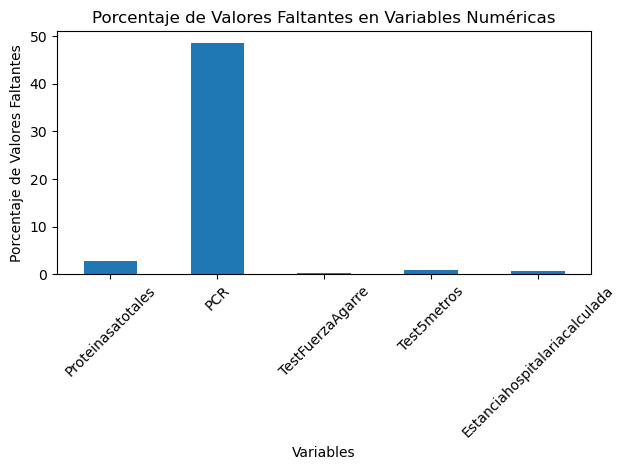

In [3]:
# Faltantes Variables Numéricas
cols_num = X_num.columns
cols_num_null = X_num.isnull().sum()
cols_num_null = cols_num_null[cols_num_null > 0]

# Convertir a porcentaje
cols_num_null_percentage = (cols_num_null / len(X_num)) * 100

# Verificar si hay valores faltantes antes de graficar
if not cols_num_null_percentage.empty:
    # Graficar los valores faltantes en porcentaje
    cols_num_null_percentage.plot(kind='bar')
    plt.title('Porcentaje de Valores Faltantes en Variables Numéricas')
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en las Variables Numéricas.")

In [4]:
# Completar los valores faltantes 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_num = imputer.fit_transform(X_num)
X_num = pd.DataFrame(X_num, columns=cols_num)
X = pd.concat([X_num, X_cat], axis=1)

In [5]:
# Faltantes Variables Categóricas
cols_cat = X_cat.columns
cols_cat_null = X_cat.isnull().sum()
cols_cat_null = cols_cat_null[cols_cat_null > 0]

# Convertir a porcentaje
cols_cat_null_percentage = (cols_cat_null / len(X_cat)) * 100

# Verificar si hay valores faltantes antes de graficar
if not cols_cat_null_percentage.empty:
    # Graficar los valores faltantes en porcentaje
    cols_cat_null_percentage.plot(kind='bar')
    plt.title('Porcentaje de Valores Faltantes en Variables Categóricas')
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en las Variables Categóricas.")

No hay valores faltantes en las Variables Categóricas.


### Análisis de Duplicados

In [6]:
print(f"Registros Duplicados: {X.duplicated().sum()}")

Registros Duplicados: 0


## ANÁLISIS ESTADÍSTICO VARIABLES NUMÉRICAS

### ANÁLISIS EXPORATORIO (EDA)

In [7]:
# Previsualización de los datos
print(X_num.shape)
print(X_num.describe().to_string())



(325, 10)
             Edad         IMC      Htopre    Leucograma  Creatininapre  Proteinasatotales         PCR  TestFuerzaAgarre  Test5metros  Estanciahospitalariacalculada
count  325.000000  325.000000  325.000000    325.000000     325.000000         325.000000  325.000000        325.000000   325.000000                     325.000000
mean    68.344615   27.474364   41.141538   7871.738462       1.056797           7.221077    3.665846         27.507385     7.176600                      13.246154
std     10.791143    4.356814   21.585841   3349.262506       0.341193           0.820593    9.732796         10.809186     4.137528                       8.262721
min     19.000000   10.000000   21.500000   1520.000000       0.510000           0.670000    0.000000          3.310000     0.040000                       2.000000
25%     62.000000   24.540000   37.000000   6290.000000       0.840000           6.900000    1.000000         19.400000     4.840000                       9.000000
50%   

#### Histogramas + Gráficos de Dispersión + Outliers

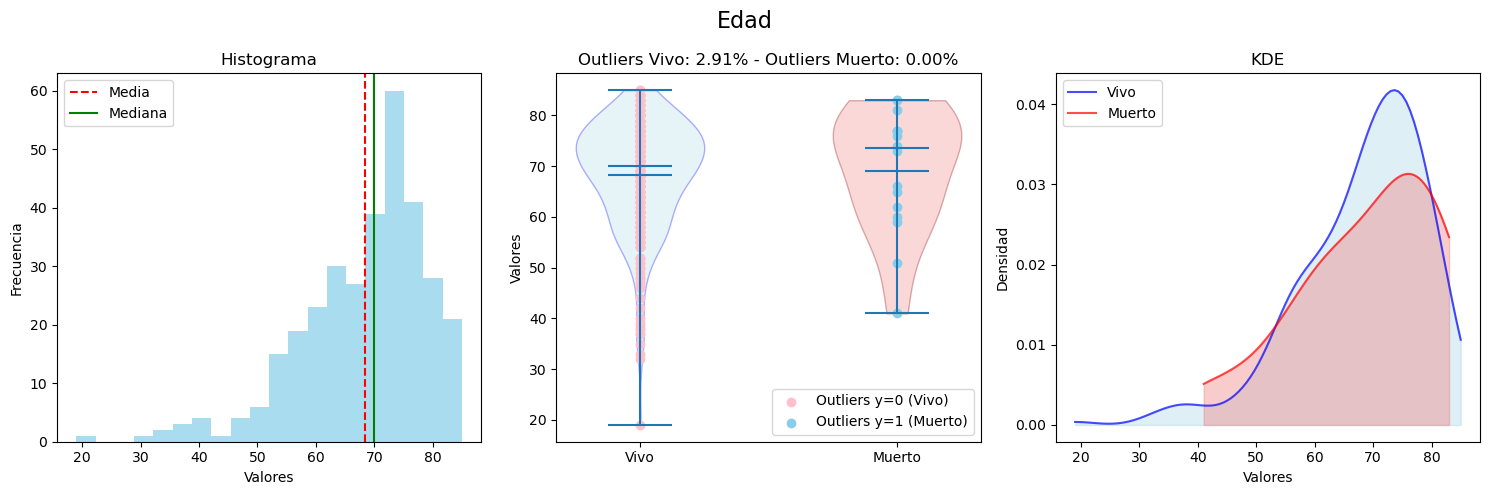

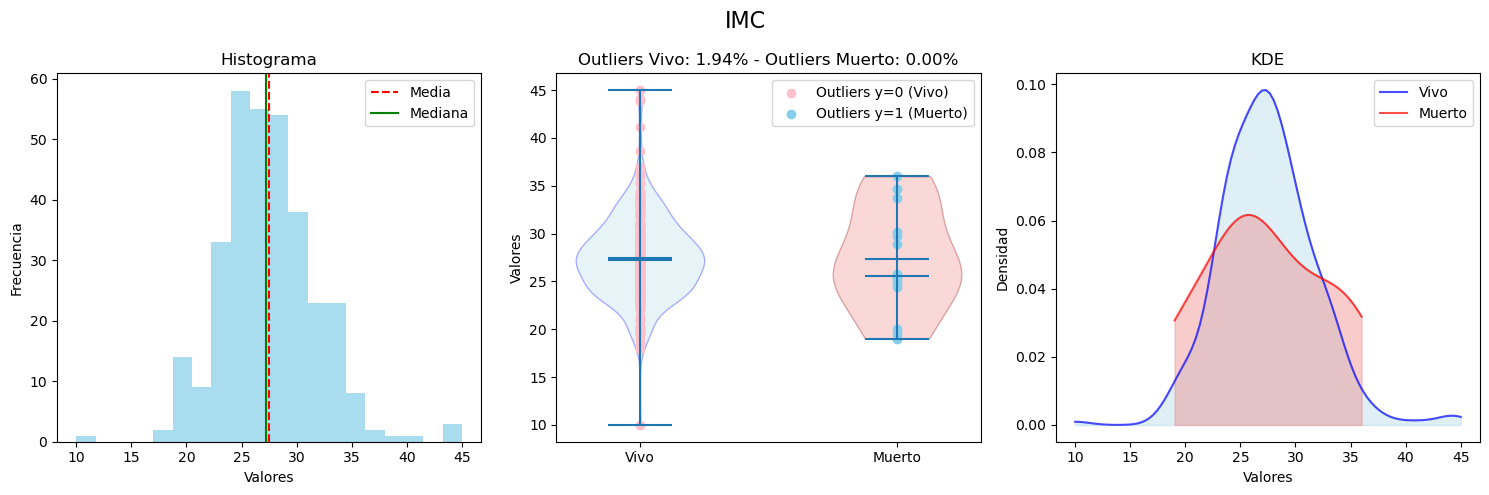

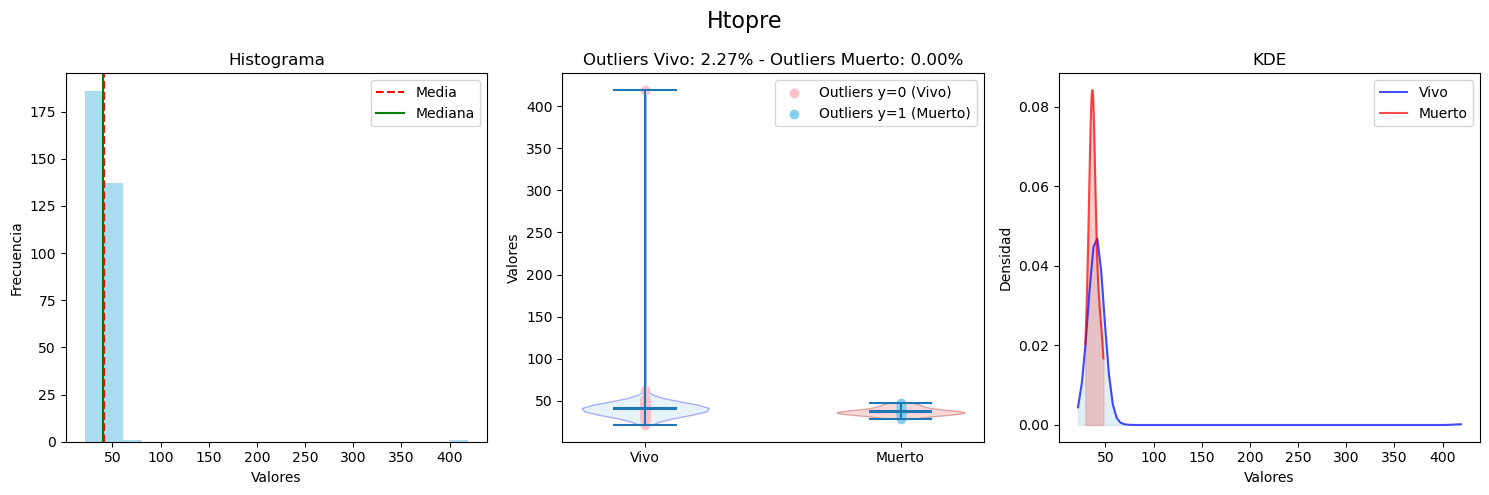

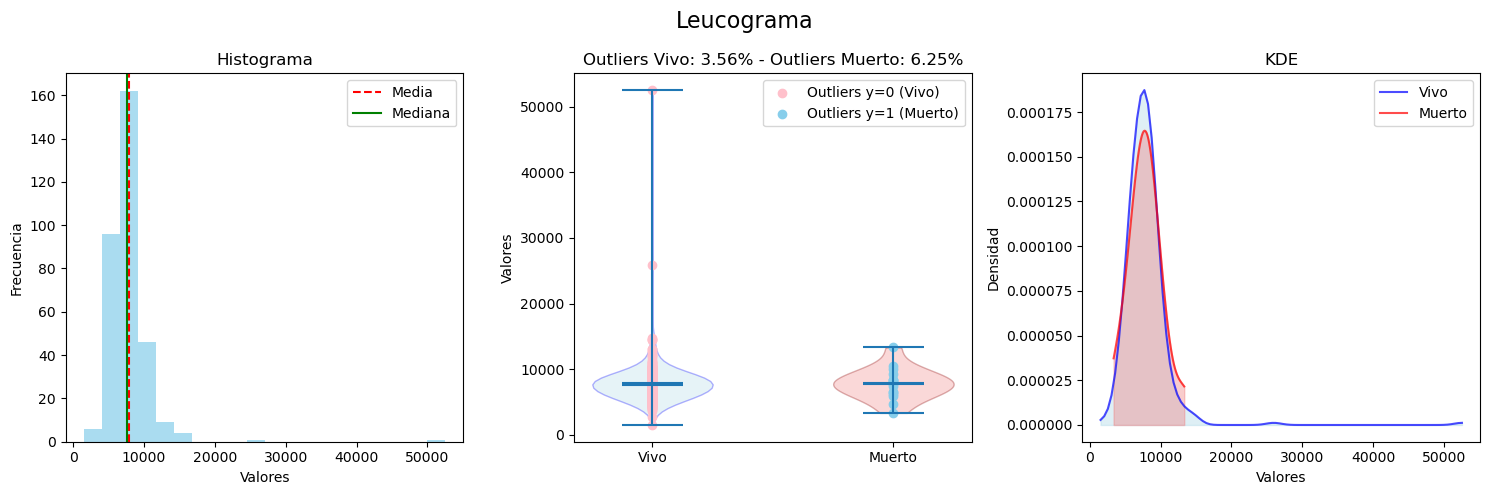

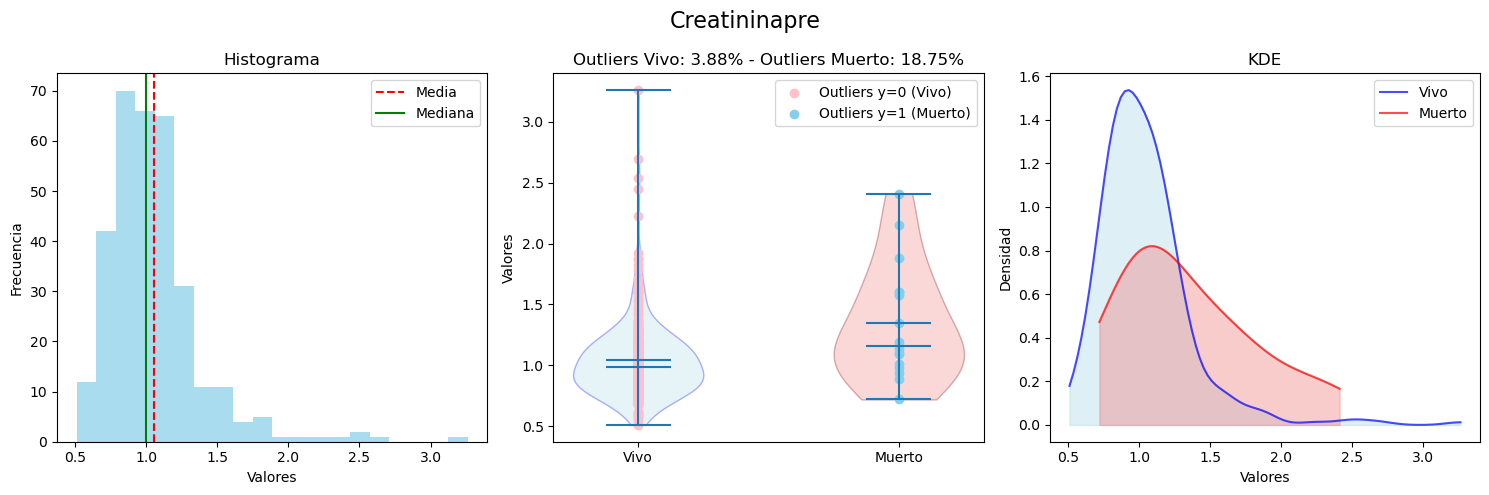

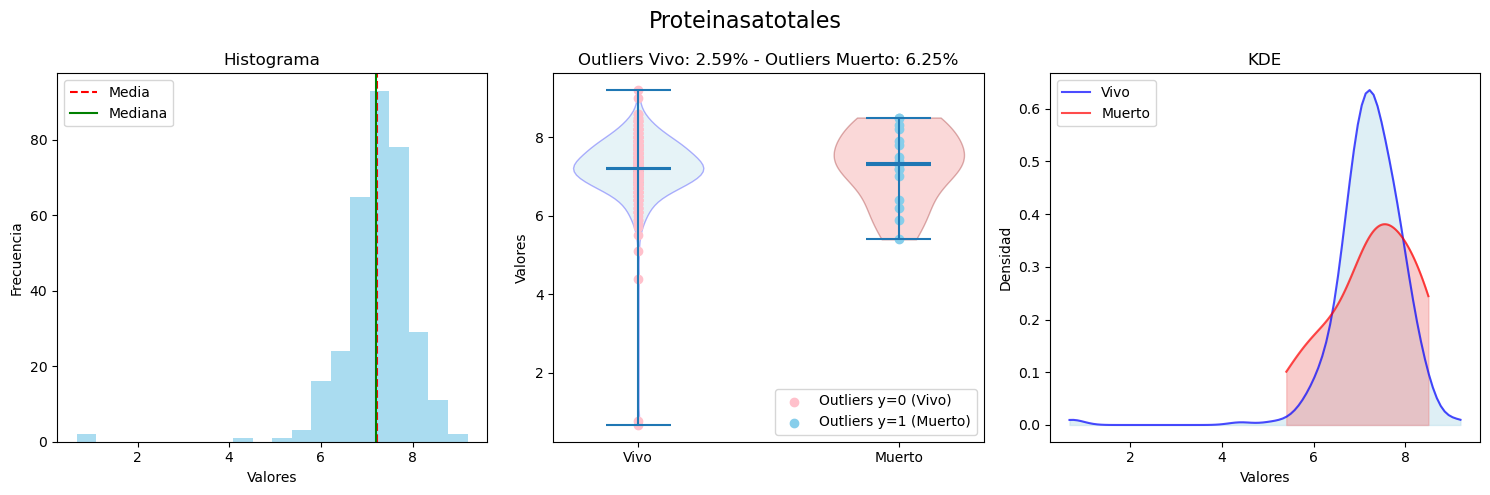

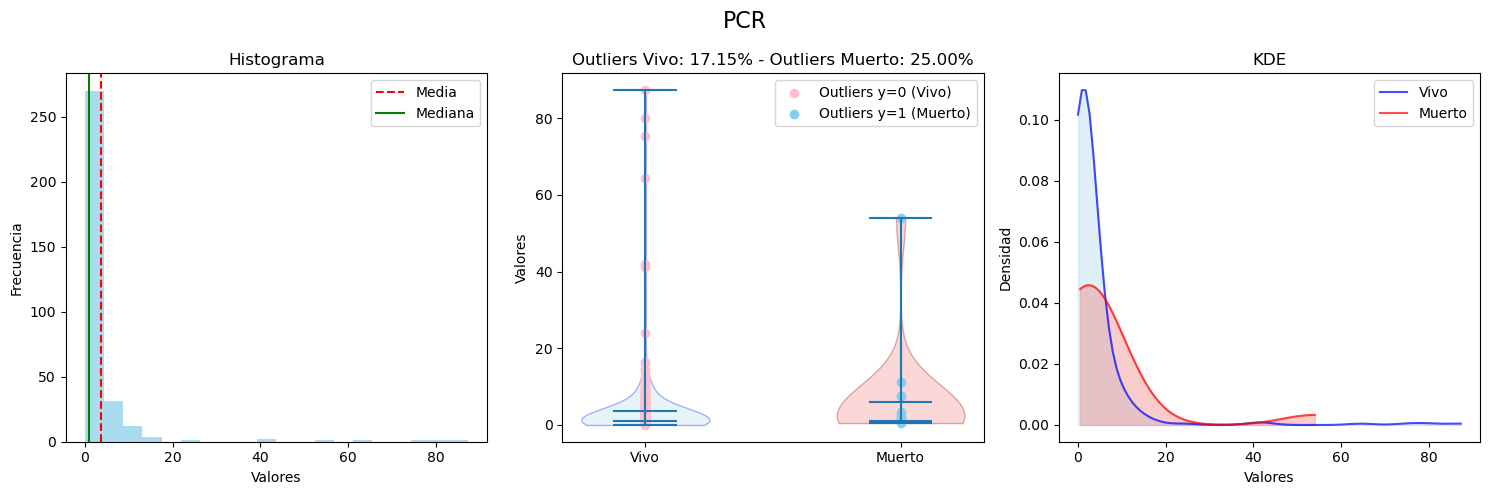

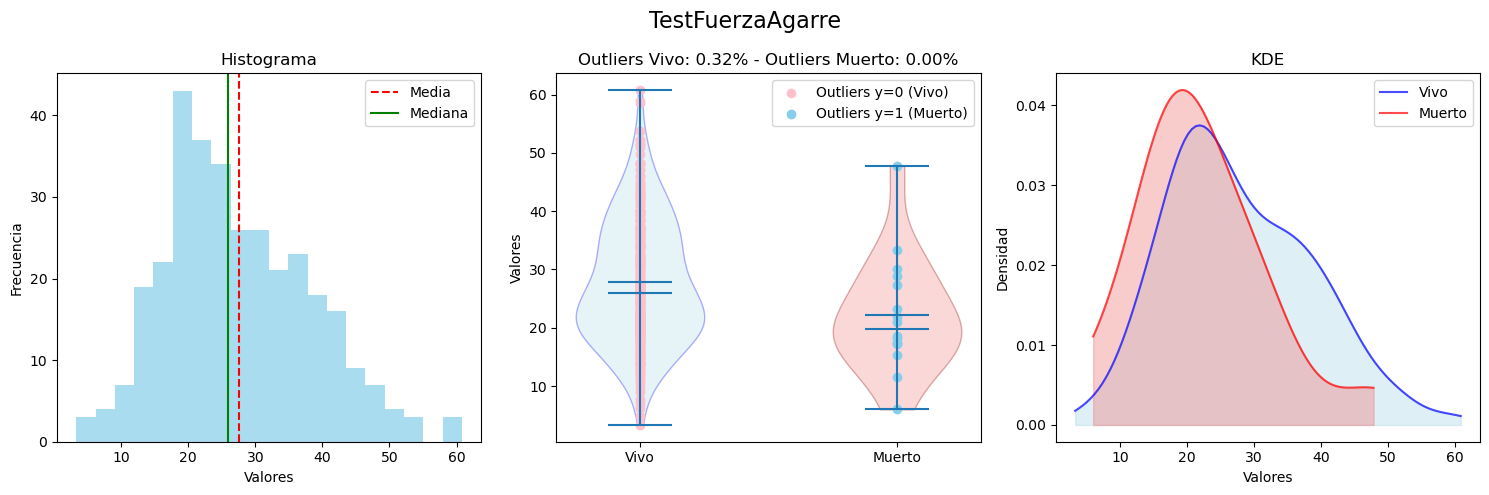

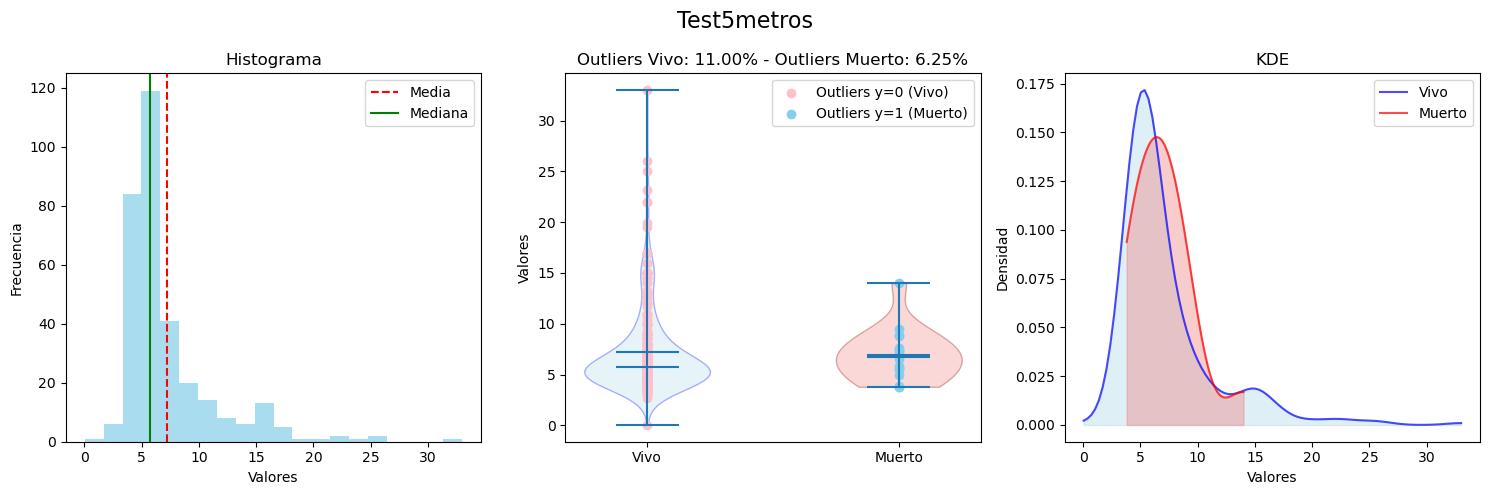

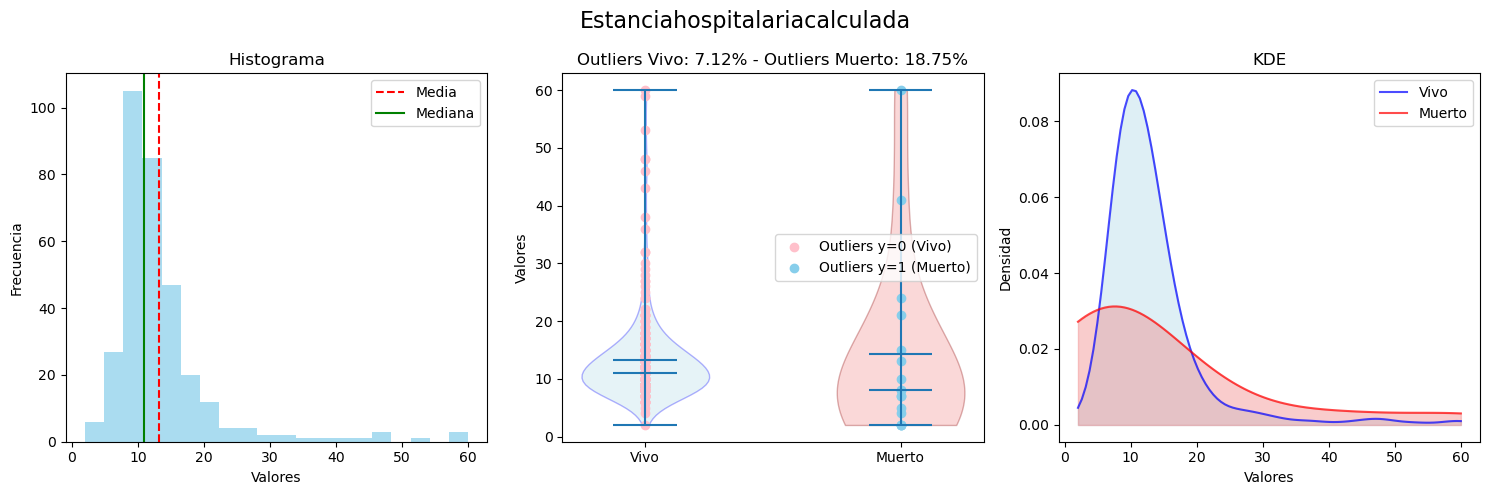

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Suponiendo que tienes las variables 'X_num', 'y', y 'cols_num' definidas

for col_name in cols_num:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  

    # Definir título de la figura
    fig.suptitle(f'{col_name}', fontsize=16)

    # Histograma a la izquierda
    ax[0].hist(X_num[col_name].dropna(), bins=20, color='skyblue', alpha=0.7)
    ax[0].set_title(f'Histograma')
    ax[0].axvline(X_num[col_name].mean(), color='r', linestyle='--', label='Media')
    ax[0].axvline(X_num[col_name].median(), color='g', linestyle='-', label='Mediana')
    ax[0].set_xlabel('Valores')
    ax[0].set_ylabel('Frecuencia')
    ax[0].legend()

    # Violinplot a la derecha
    data = [X_num[col_name][y == 0].dropna(), X_num[col_name][y == 1].dropna()]

    # Crear el violinplot
    violin_parts = ax[1].violinplot(data, showmeans=True, showextrema=True, showmedians=True)

    # Cambiar colores de los violines
    for i, partname in enumerate(violin_parts['bodies']):
        if i == 0:  # Class 0: "Vivo"
            partname.set_facecolor('lightblue')  # Color para "Vivo"
            partname.set_edgecolor('blue')
        else:  # Class 1: "Muerto"
            partname.set_facecolor('lightcoral')  # Color para "Muerto"
            partname.set_edgecolor('darkred')

    ax[1].set_title(f'Violinplot de {col_name}')
    ax[1].set_xticks([1, 2])
    ax[1].set_xticklabels(['Vivo', 'Muerto'])
    ax[1].set_ylabel('Valores')

    # Identificación de outliers por clases
    def detect_outliers_iqr(data):
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        return outliers

    outliers = detect_outliers_iqr(X_num[col_name])

    # Separar los outliers de la clase 0 y la clase 1
    outliers_0 = outliers[y == 0]
    outliers_1 = outliers[y == 1]

    # Calcular el porcentaje de outliers respecto al número total de valores de esa clase
    outliers_1_percentage = len(outliers_1) / len(X_num[y == 1]) * 100
    outliers_0_percentage = len(outliers_0) / len(X_num[y == 0]) * 100

    # Graficar los outliers en diferentes colores
    outliers_0 = X_num[col_name][y == 0]  # y es tu variable objetivo
    if not outliers_0.empty:
        ax[1].scatter(x=[1] * len(outliers_0), y=outliers_0, color='pink', label='Outliers y=0 (Vivo)')

    outliers_1 = X_num[col_name][y == 1]
    if not outliers_1.empty:
        ax[1].scatter(x=[2] * len(outliers_1), y=outliers_1, color='skyblue', label='Outliers y=1 (Muerto)')

    # Título del violinplot con los porcentajes de outliers
    ax[1].set_title(f'Outliers Vivo: {outliers_0_percentage:.2f}% - Outliers Muerto: {outliers_1_percentage:.2f}%')
    ax[1].legend()

    # KDE Plot
    x_0 = X_num[col_name][y == 0].dropna()
    x_1 = X_num[col_name][y == 1].dropna()

    if len(x_0) > 1:  # Asegurarse de que hay suficientes datos para calcular KDE
        kde_0 = gaussian_kde(x_0)
        x_vals_0 = np.linspace(x_0.min(), x_0.max(), 100)
        ax[2].plot(x_vals_0, kde_0(x_vals_0), label='Vivo', color='blue', alpha=0.7)
        # Rellenar el área bajo la curva con un color cremoso y semi-transparente
        ax[2].fill_between(x_vals_0, kde_0(x_vals_0), color='lightblue', alpha=0.4)

    if len(x_1) > 1:  # Asegurarse de que hay suficientes datos para calcular KDE
        kde_1 = gaussian_kde(x_1)
        x_vals_1 = np.linspace(x_1.min(), x_1.max(), 100)
        ax[2].plot(x_vals_1, kde_1(x_vals_1), label='Muerto', color='red', alpha=0.7)
        # Rellenar el área bajo la curva con un color naranja claro y semi-transparente
        ax[2].fill_between(x_vals_1, kde_1(x_vals_1), color='lightcoral', alpha=0.4)

    ax[2].set_title(f'KDE')
    ax[2].set_xlabel('Valores')
    ax[2].set_ylabel('Densidad')
    ax[2].legend()

    plt.tight_layout()
    plt.show()


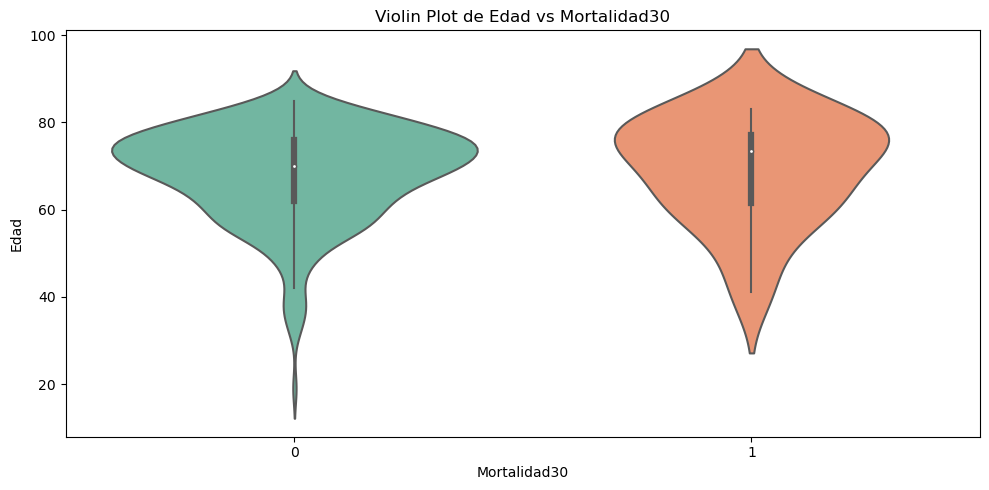

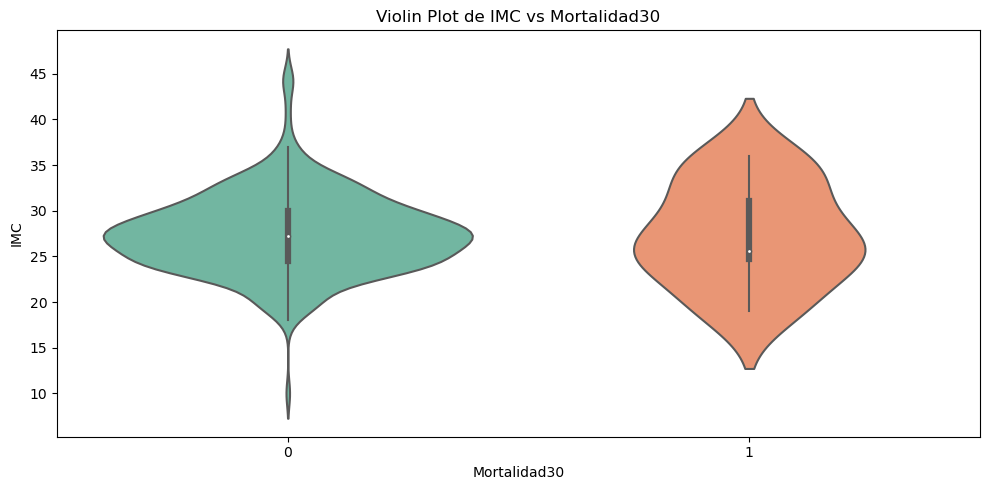

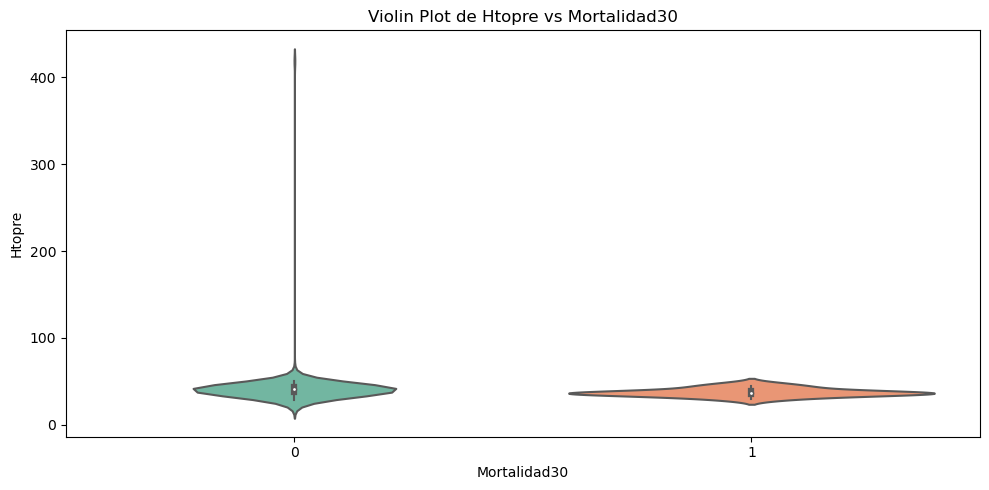

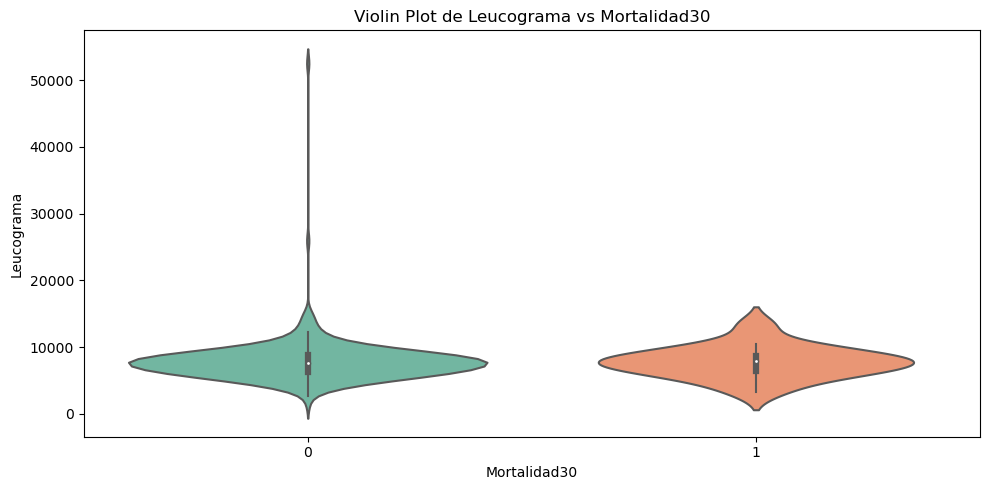

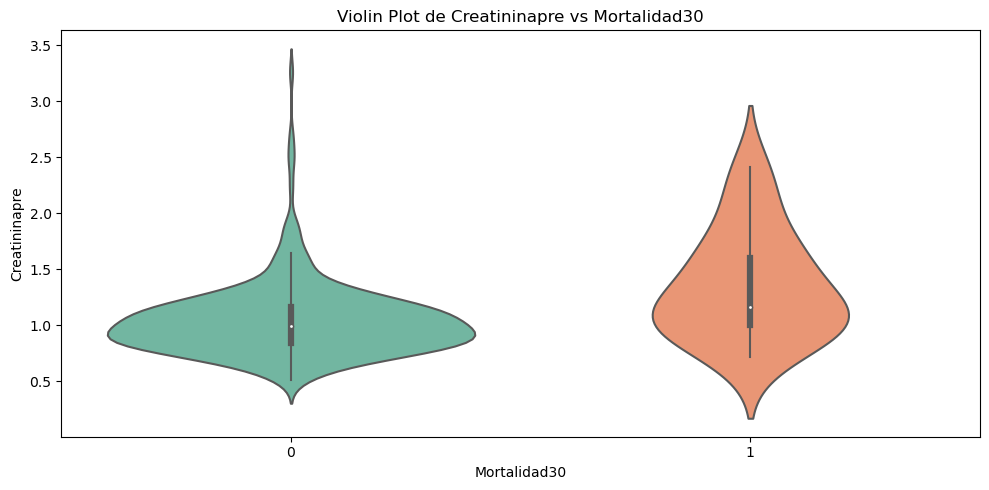

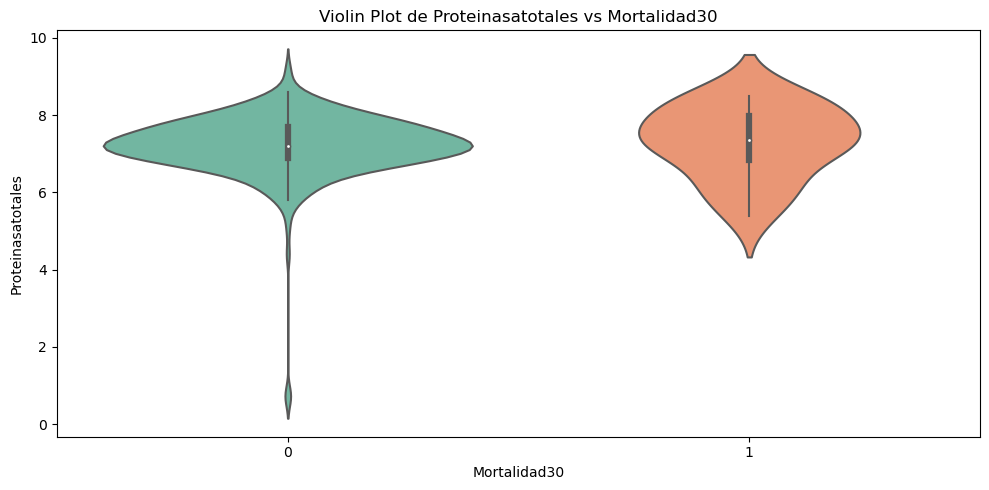

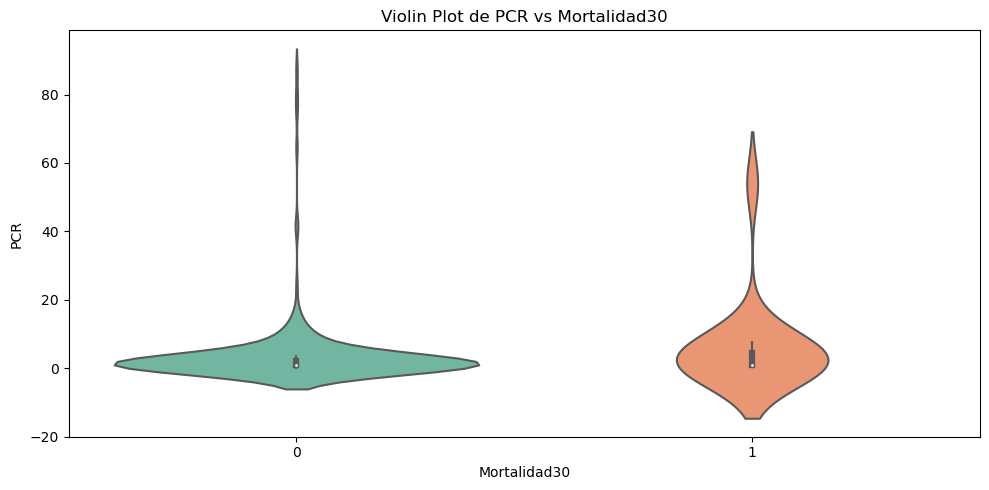

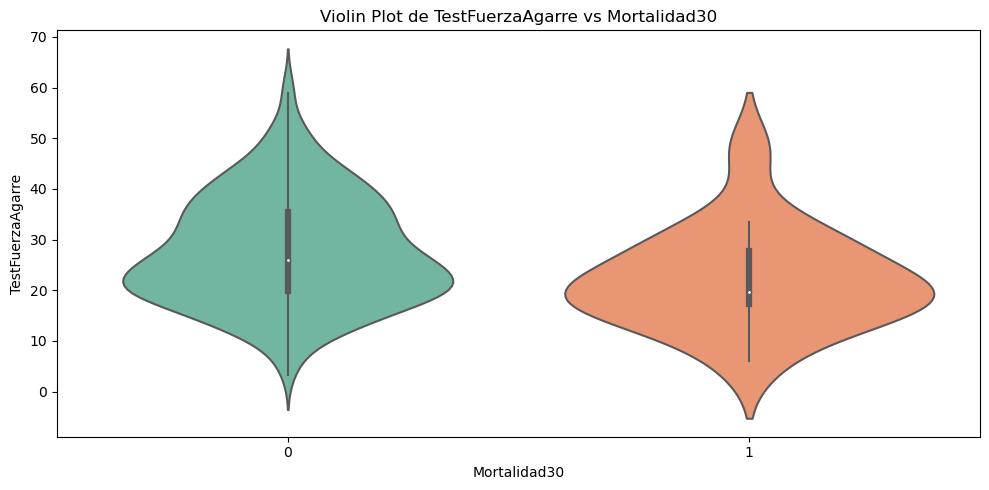

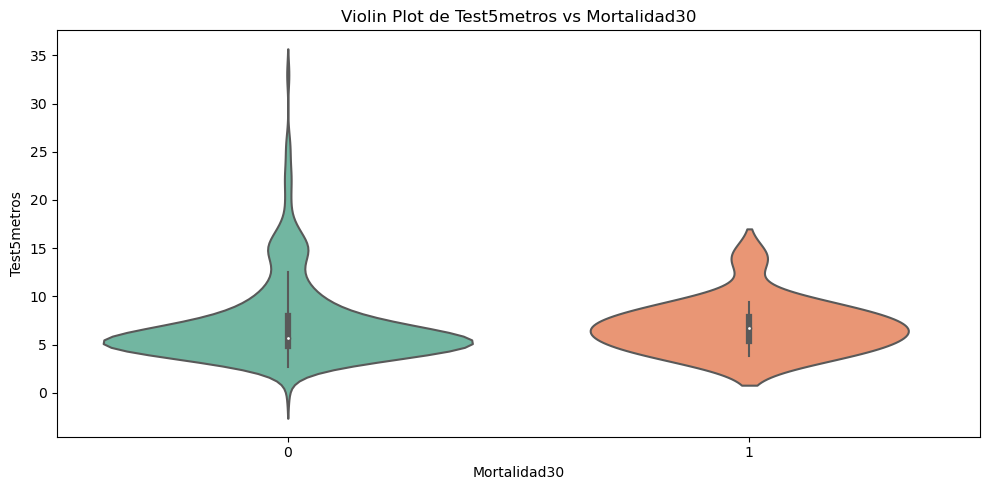

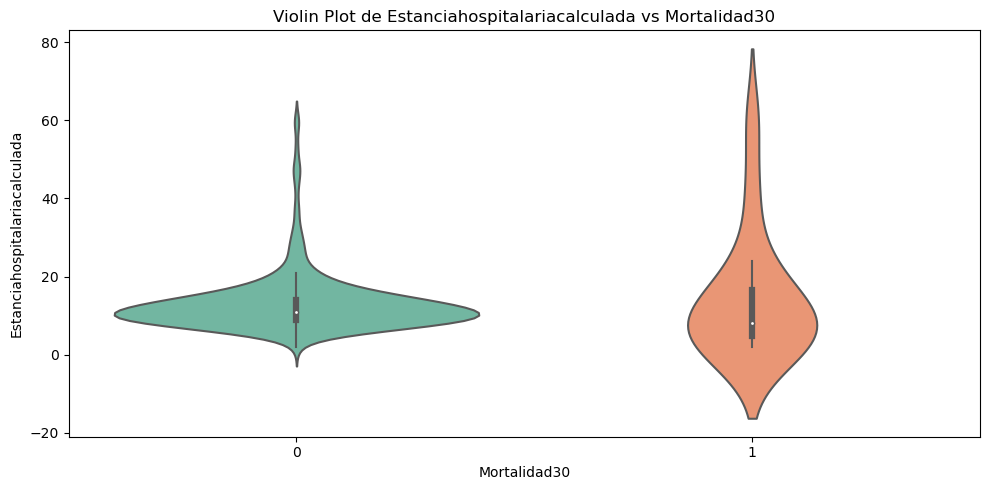

In [9]:
for col_name in cols_num:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.violinplot(x=y, y=X_num[col_name], ax=ax, palette="Set2")
    ax.set_title(f'Violin Plot de {col_name} vs Mortalidad30')
    ax.set_xlabel('Mortalidad30')
    ax.set_ylabel(col_name)
    plt.tight_layout()
    plt.legend
    plt.show()


#### Matriz de Correlacción

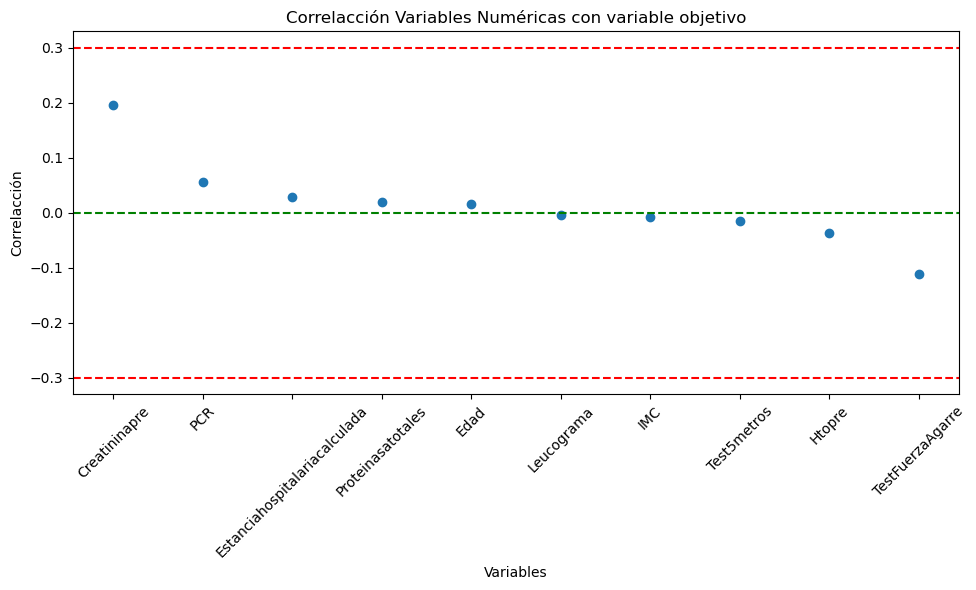

In [10]:
# Correlacción Variables Numéricas con Variable Objetivo
correlation_matrix = X_num.corrwith(y)
correlation_matrix = correlation_matrix.dropna()
correlation_matrix = correlation_matrix.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6)) 
plt.scatter(correlation_matrix.index, correlation_matrix)
plt.xticks(rotation=45)
plt.title('Correlacción Variables Numéricas con variable objetivo')
plt.xlabel('Variables')
plt.ylabel('Correlacción')
plt.tight_layout()
plt.axhline(y=0.3, color='r', linestyle='--')
plt.axhline(y=-0.3, color='r', linestyle='--')
plt.axhline(y=0, color='g', linestyle='--')
plt.show()


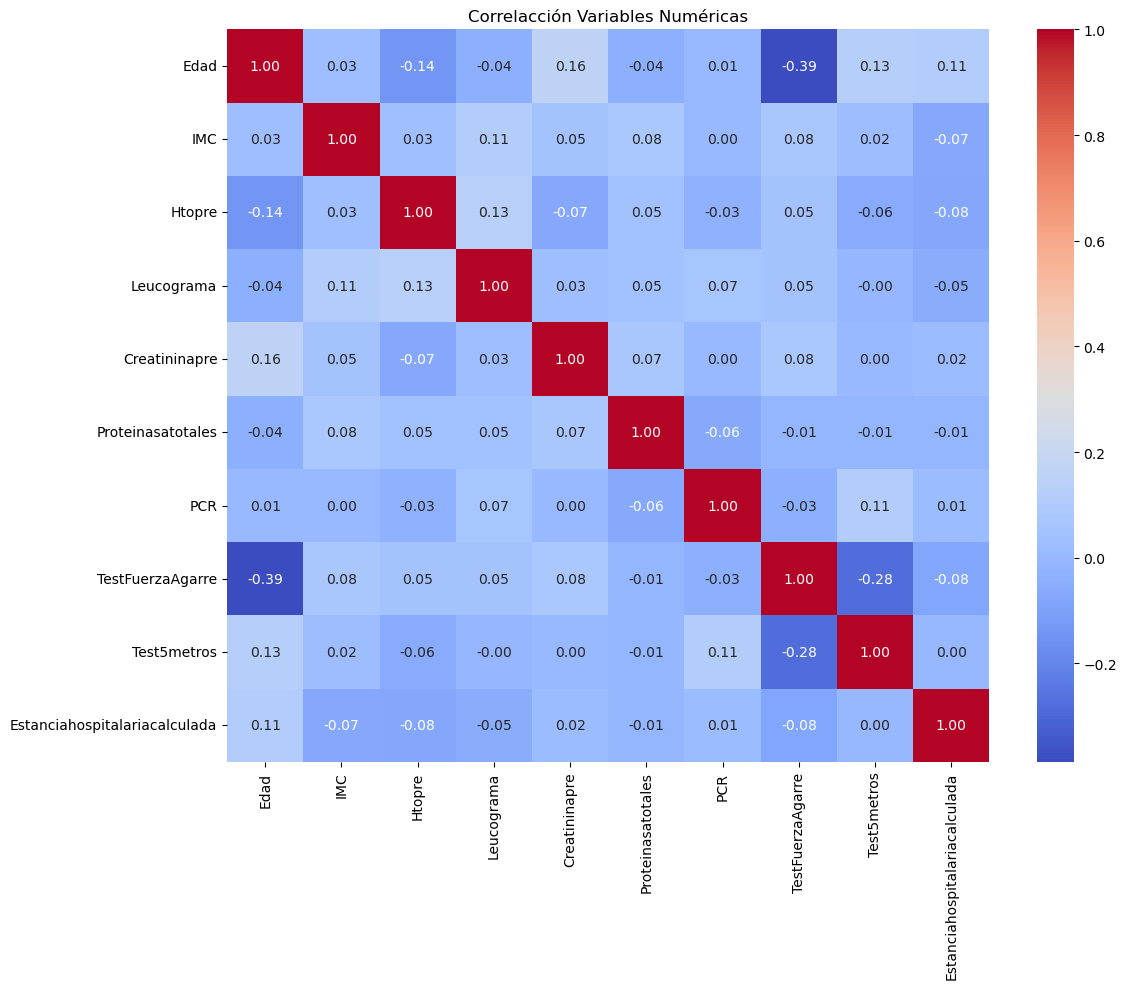

In [11]:
# Matriz de Correlacción Variables Numéricas
correlation_matrix = X_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlacción Variables Numéricas')
plt.tight_layout()
plt.show()

Creatininapre                    0.000361
TestFuerzaAgarre                 0.043561
PCR                              0.316966
Htopre                           0.498744
Estanciahospitalariacalculada    0.597288
Proteinasatotales                0.716980
Test5metros                      0.777729
Edad                             0.785401
IMC                              0.902346
Leucograma                       0.931965
dtype: float64


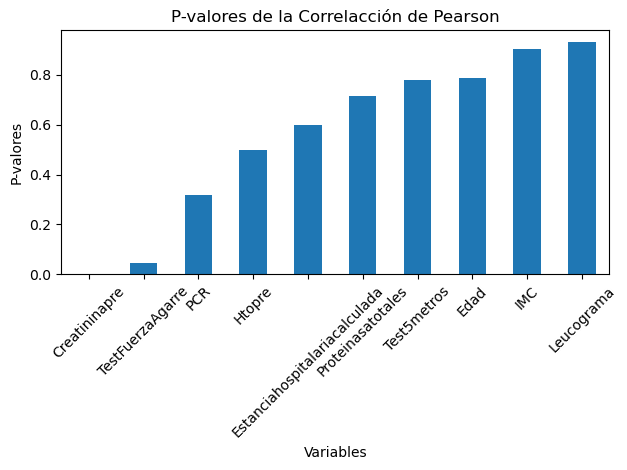

In [12]:
# Calcular los p-valores, manejando valores faltantes
from scipy.stats import pearsonr

pvalues = {}
for col in X_num.columns:
    # Eliminar filas con valores faltantes en la columna actual o en y
    valid_data = X_num[[col]].join(y).dropna()
    if len(valid_data) > 1:  # Asegurarse de que haya suficientes datos para calcular Pearson
        pvalues[col] = pearsonr(valid_data[col], valid_data['Mortalidad30'])[1]
    else:
        pvalues[col] = np.nan  # Si no hay suficientes datos, asignar NaN

# Convertir a Series y ordenar
pvalues = pd.Series(pvalues)
pvalues = pvalues.sort_values(ascending=True)

# Mostrar los resultados
print(pvalues)

# Graficar los p-valores
pvalues.plot(kind='bar')
plt.title('P-valores de la Correlacción de Pearson')
plt.xlabel('Variables')
plt.ylabel('P-valores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### TEST DE NORMALIDAD

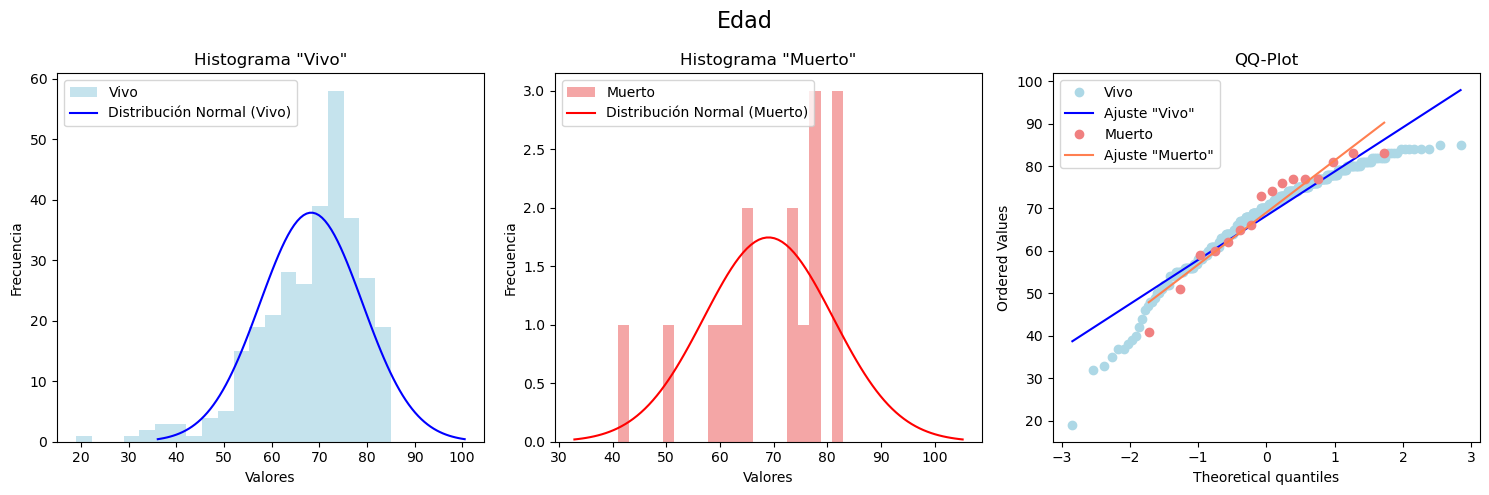

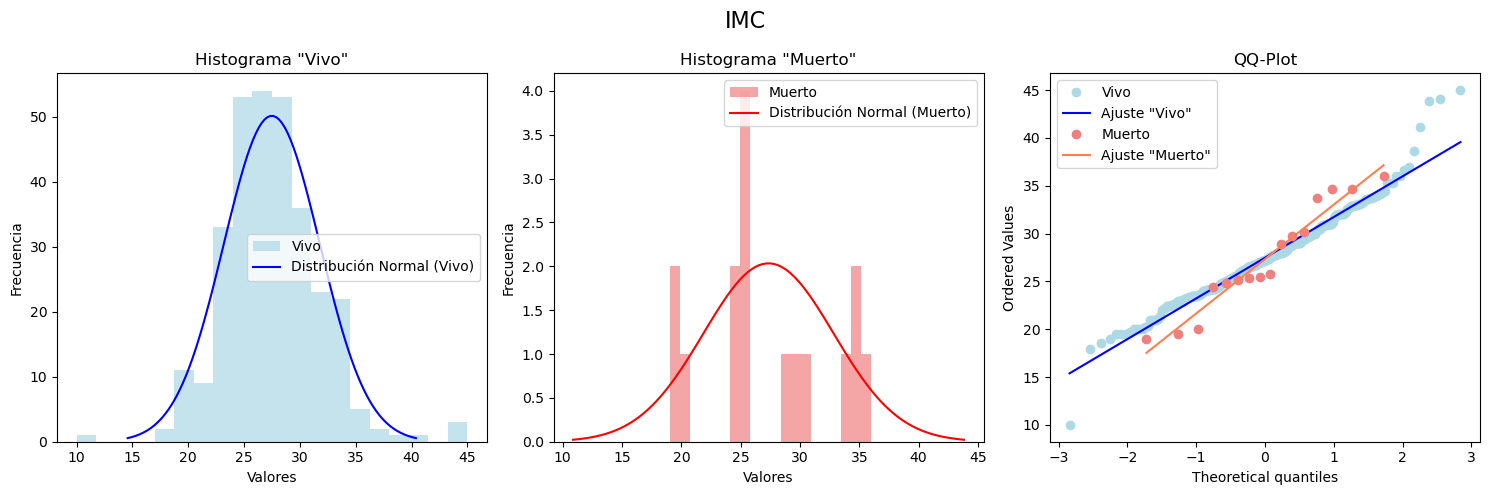

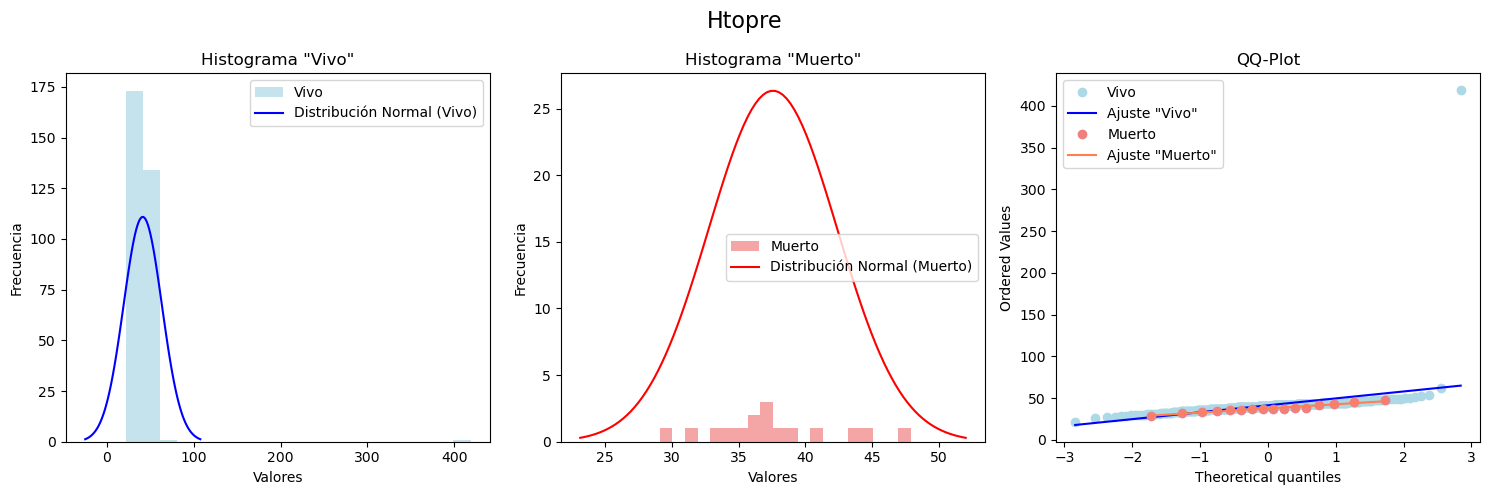

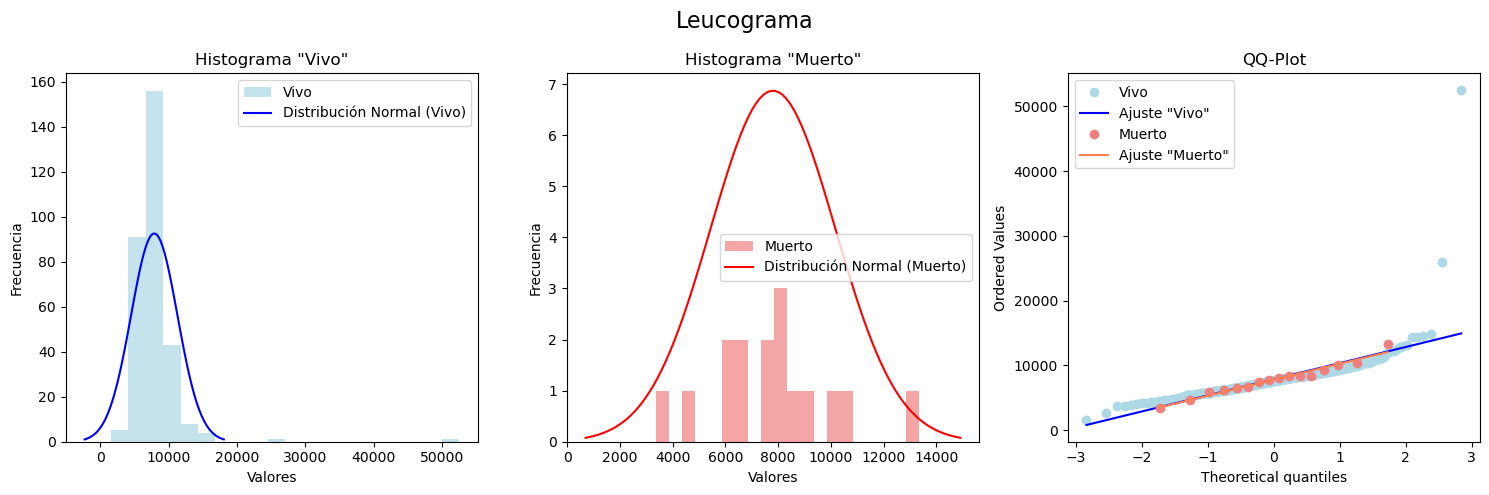

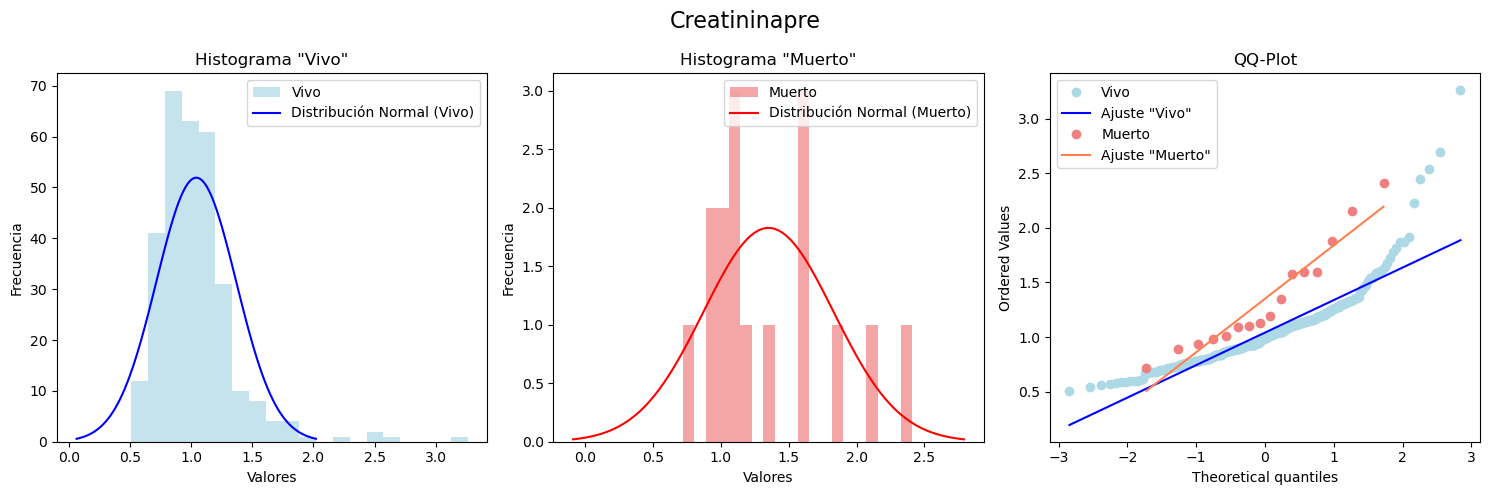

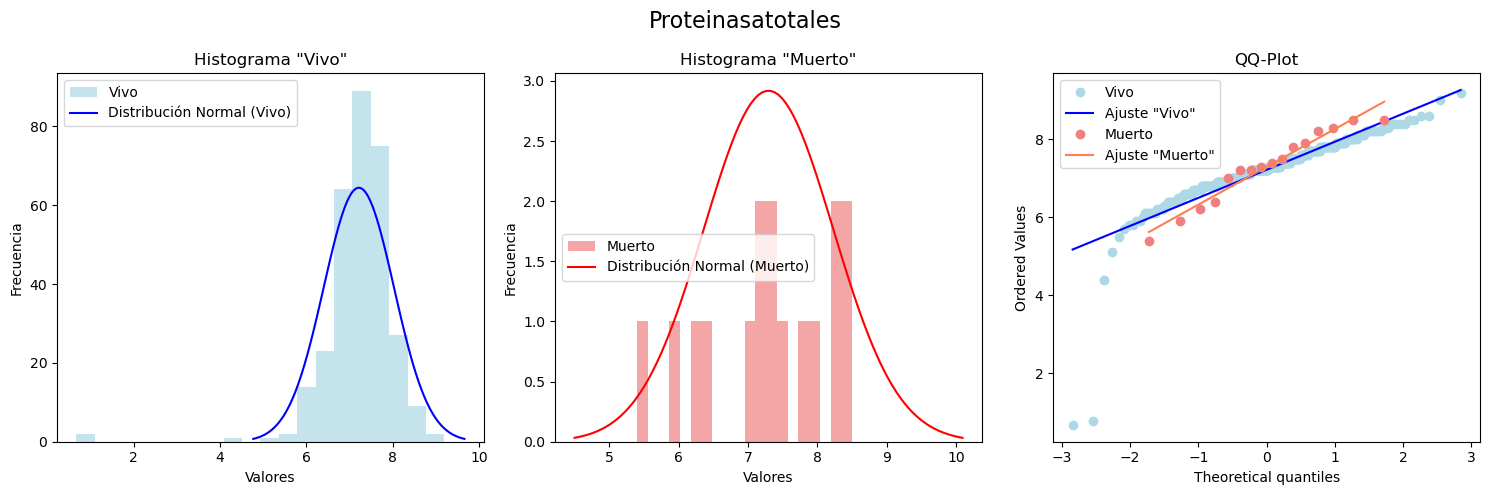

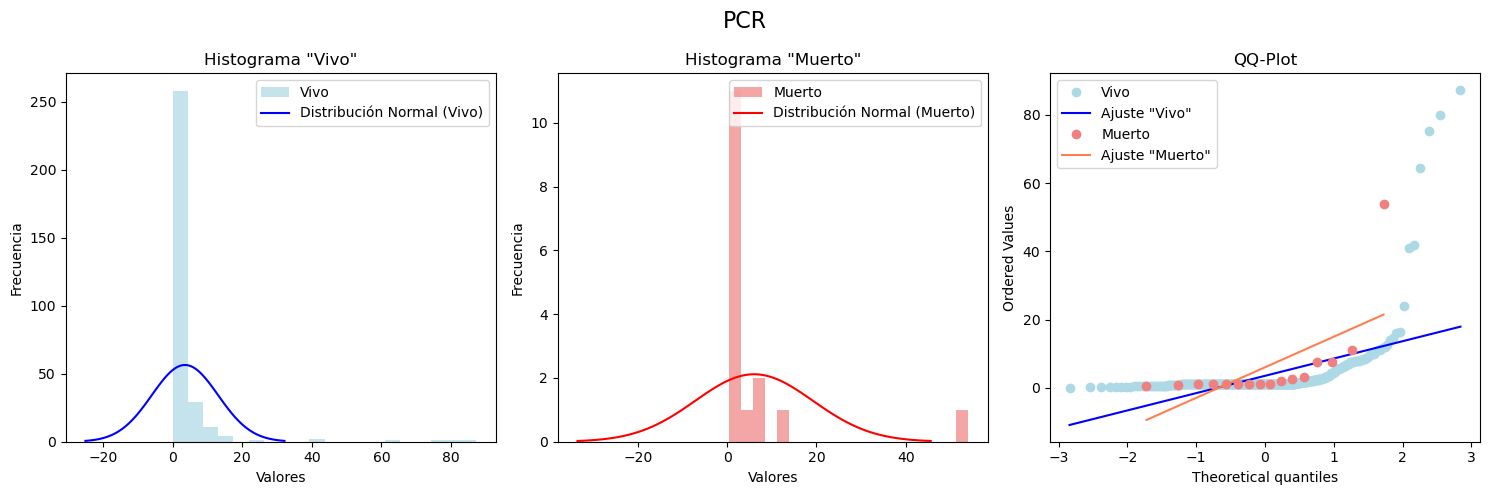

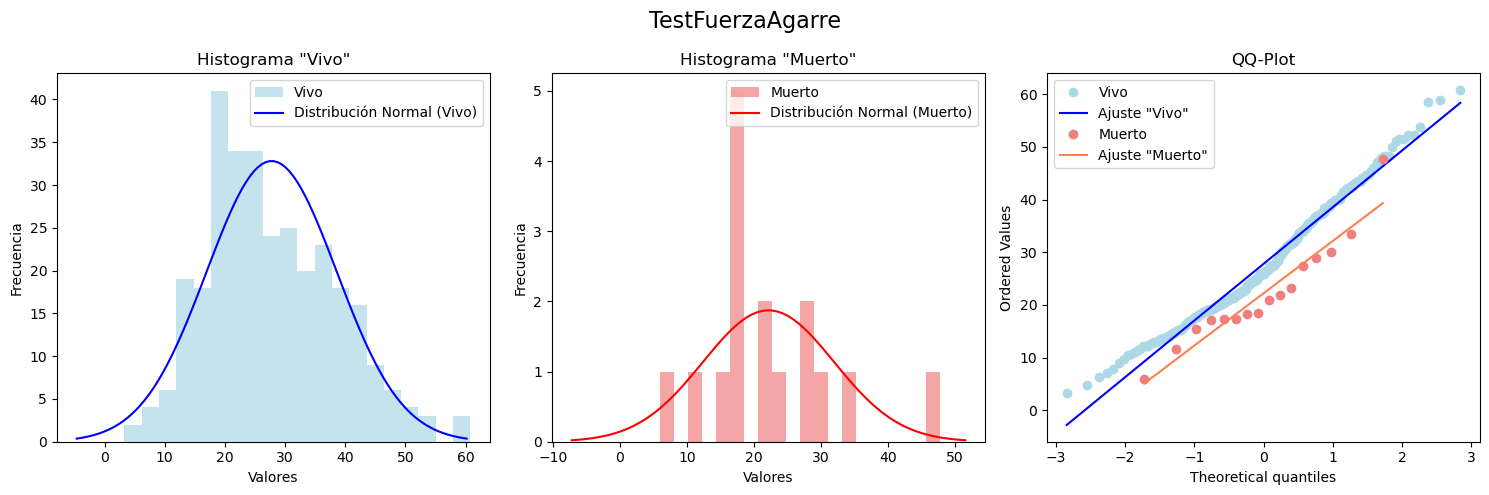

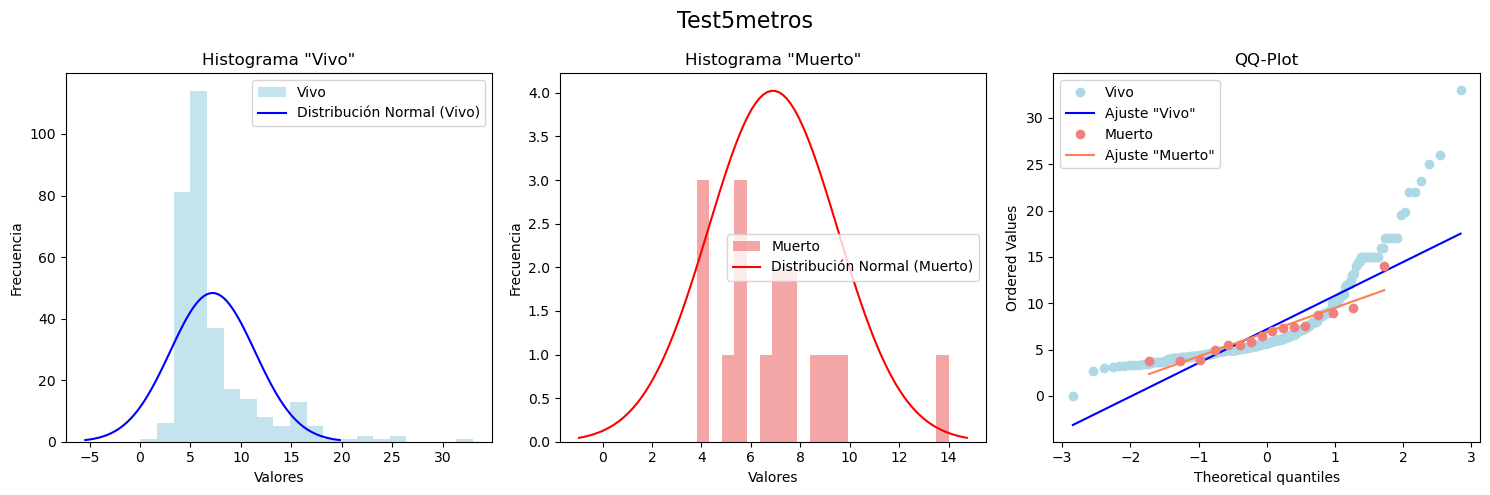

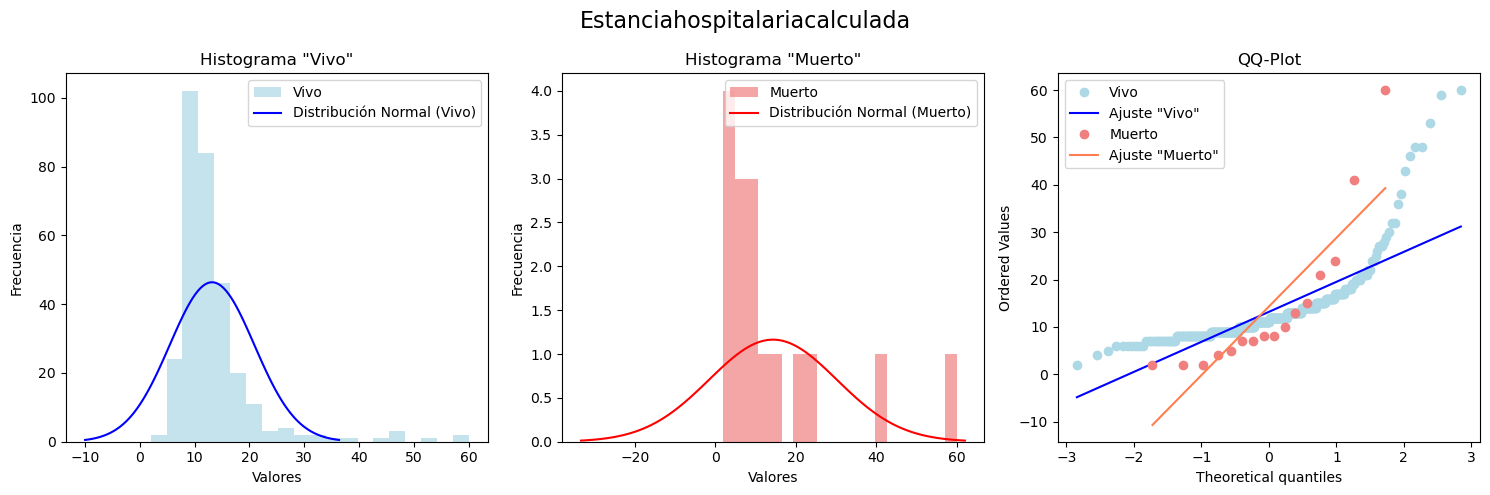

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro, normaltest
import pandas as pd
from itertools import product


# Asegurarse de que X_num sea un DataFrame
if isinstance(X_num, np.ndarray):
    X_num = pd.DataFrame(X_num, columns=cols_num)

# Filtrar y alinear y para que coincida con los índices de X_num
y_aligned = pd.Series(y, index=X_num.index) if isinstance(y, np.ndarray) else y.loc[X_num.index]

columns = ['Numerical Variable', 'Clase', 'Kurtosis', 'Skewness', 'Shapiro-Wilk', 'DAgostinos']
classes = ['Vivo', 'Muerto']
norm_metrics = pd.DataFrame(list(product(cols_num, classes)), columns=['Numerical Variable', 'Clase'])

# Agregar columnas para las métricas
norm_metrics['Kurtosis'] = np.nan
norm_metrics['Skewness'] = np.nan
norm_metrics['Shapiro-Wilk'] = np.nan
norm_metrics['DAgostinos'] = np.nan

for col_name in cols_num:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  

    # Definir título de la figura
    fig.suptitle(f'{col_name}', fontsize=16)

    # Histograma Vivo
    data_class_0 = X_num[col_name][y_aligned == 0].dropna()
    ax[0].hist(data_class_0, bins=20, color='lightblue', alpha=0.7, label='Vivo', density=False)
    ax[0].set_title(f'Histograma "Vivo"')
    ax[0].set_xlabel('Valores')
    ax[0].set_ylabel('Frecuencia')
    ax[0].legend()

    mu_class_0 = data_class_0.mean()
    sigma_class_0 = data_class_0.std()
    x_gauss_0 = np.linspace(mu_class_0 - 3 * sigma_class_0, mu_class_0 + 3 * sigma_class_0, 100)
    bin_width = (ax[0].patches[0].get_width() if ax[0].patches else 1)  # Ancho de los bins
    y_gauss_0 = (1 / (sigma_class_0 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_gauss_0 - mu_class_0) / sigma_class_0) ** 2)
    y_gauss_scaled_0 = y_gauss_0 * len(data_class_0) * bin_width  # Escalar la distribución normal
    ax[0].plot(x_gauss_0, y_gauss_scaled_0, color='blue', label='Distribución Normal (Vivo)')
    ax[0].legend()

    # Histograma Muerto
    data_class_1 = X_num[col_name][y_aligned == 1].dropna()
    ax[1].hist(data_class_1, bins=20, color='lightcoral', alpha=0.7, label='Muerto', density=False)
    ax[1].set_title(f'Histograma "Muerto"')
    ax[1].set_xlabel('Valores')
    ax[1].set_ylabel('Frecuencia')

    mu_class_1 = data_class_1.mean()
    sigma_class_1 = data_class_1.std()
    x_gauss_1 = np.linspace(mu_class_1 - 3 * sigma_class_1, mu_class_1 + 3 * sigma_class_1, 100)
    y_gauss_1 = (1 / (sigma_class_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_gauss_1 - mu_class_1) / sigma_class_1) ** 2)
    y_gauss_scaled_1 = y_gauss_1 * len(data_class_1) * bin_width  # Escalar la distribución normal
    ax[1].plot(x_gauss_1, y_gauss_scaled_1, color='red', label='Distribución Normal (Muerto)')
    ax[1].legend()

    # QQ-plot a la derecha
    probplot(data_class_0, dist="norm", plot=ax[2])
    probplot(data_class_1, dist="norm", plot=ax[2])
    ax[2].get_lines()[0].set_color('lightblue')  # Cambiar color de los puntos (clase 0)
    ax[2].get_lines()[1].set_color('blue')  # Cambiar color de la línea de ajuste (clase 0)
    ax[2].get_lines()[-2].set_color('lightcoral')  # Cambiar color de los puntos (clase 1)
    ax[2].get_lines()[-1].set_color('coral')  # Cambiar color de la línea de ajuste (clase 1)
    ax[2].set_title(f'QQ-Plot')
    ax[2].legend(['Vivo', 'Ajuste "Vivo"', 'Muerto', 'Ajuste "Muerto"'], loc='best')

    plt.tight_layout()
    plt.show()

    #Cálculo de la kurtosis de cada clase
    kurtosis_class_0 = data_class_0.kurtosis()
    kurtosis_class_1 = data_class_1.kurtosis()

    #Calcular la asimetría de cada clase
    skewness_class_0 = data_class_0.skew()
    skewness_class_1 = data_class_1.skew()

    #Calcular Shapiro-Wilk para cada clase
    shapiro_class_0_stats, shapiro_class_0_p_value = shapiro(data_class_0)
    shapiro_class_1_stats, shapiro_class_1_p_value = shapiro(data_class_1)

    #Cálculo D'Agostino's para cada clase
    dagostinos_class_0_stats, dagostinos_class_0_p_value = normaltest(data_class_0)
    dagostinos_class_1_stats, dagostinos_class_1_p_value = normaltest(data_class_1)

    #Almacenar los resultados en el DataFrame
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Vivo'), 'Kurtosis'] = kurtosis_class_0
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Muerto'), 'Kurtosis'] = kurtosis_class_1
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Vivo'), 'Skewness'] = skewness_class_0
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Muerto'), 'Skewness'] = skewness_class_1
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Vivo'), 'Shapiro-Wilk'] = shapiro_class_0_p_value
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Muerto'), 'Shapiro-Wilk'] = shapiro_class_1_p_value
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Vivo'), 'DAgostinos'] = dagostinos_class_0_p_value
    norm_metrics.loc[(norm_metrics['Numerical Variable'] == col_name) & (norm_metrics['Clase'] == 'Muerto'), 'DAgostinos'] = dagostinos_class_1_p_value


### ANÁLISIS DE HOMOCEDASTICIDAD

#### DIAGRAMA DE DISPERSIÓN

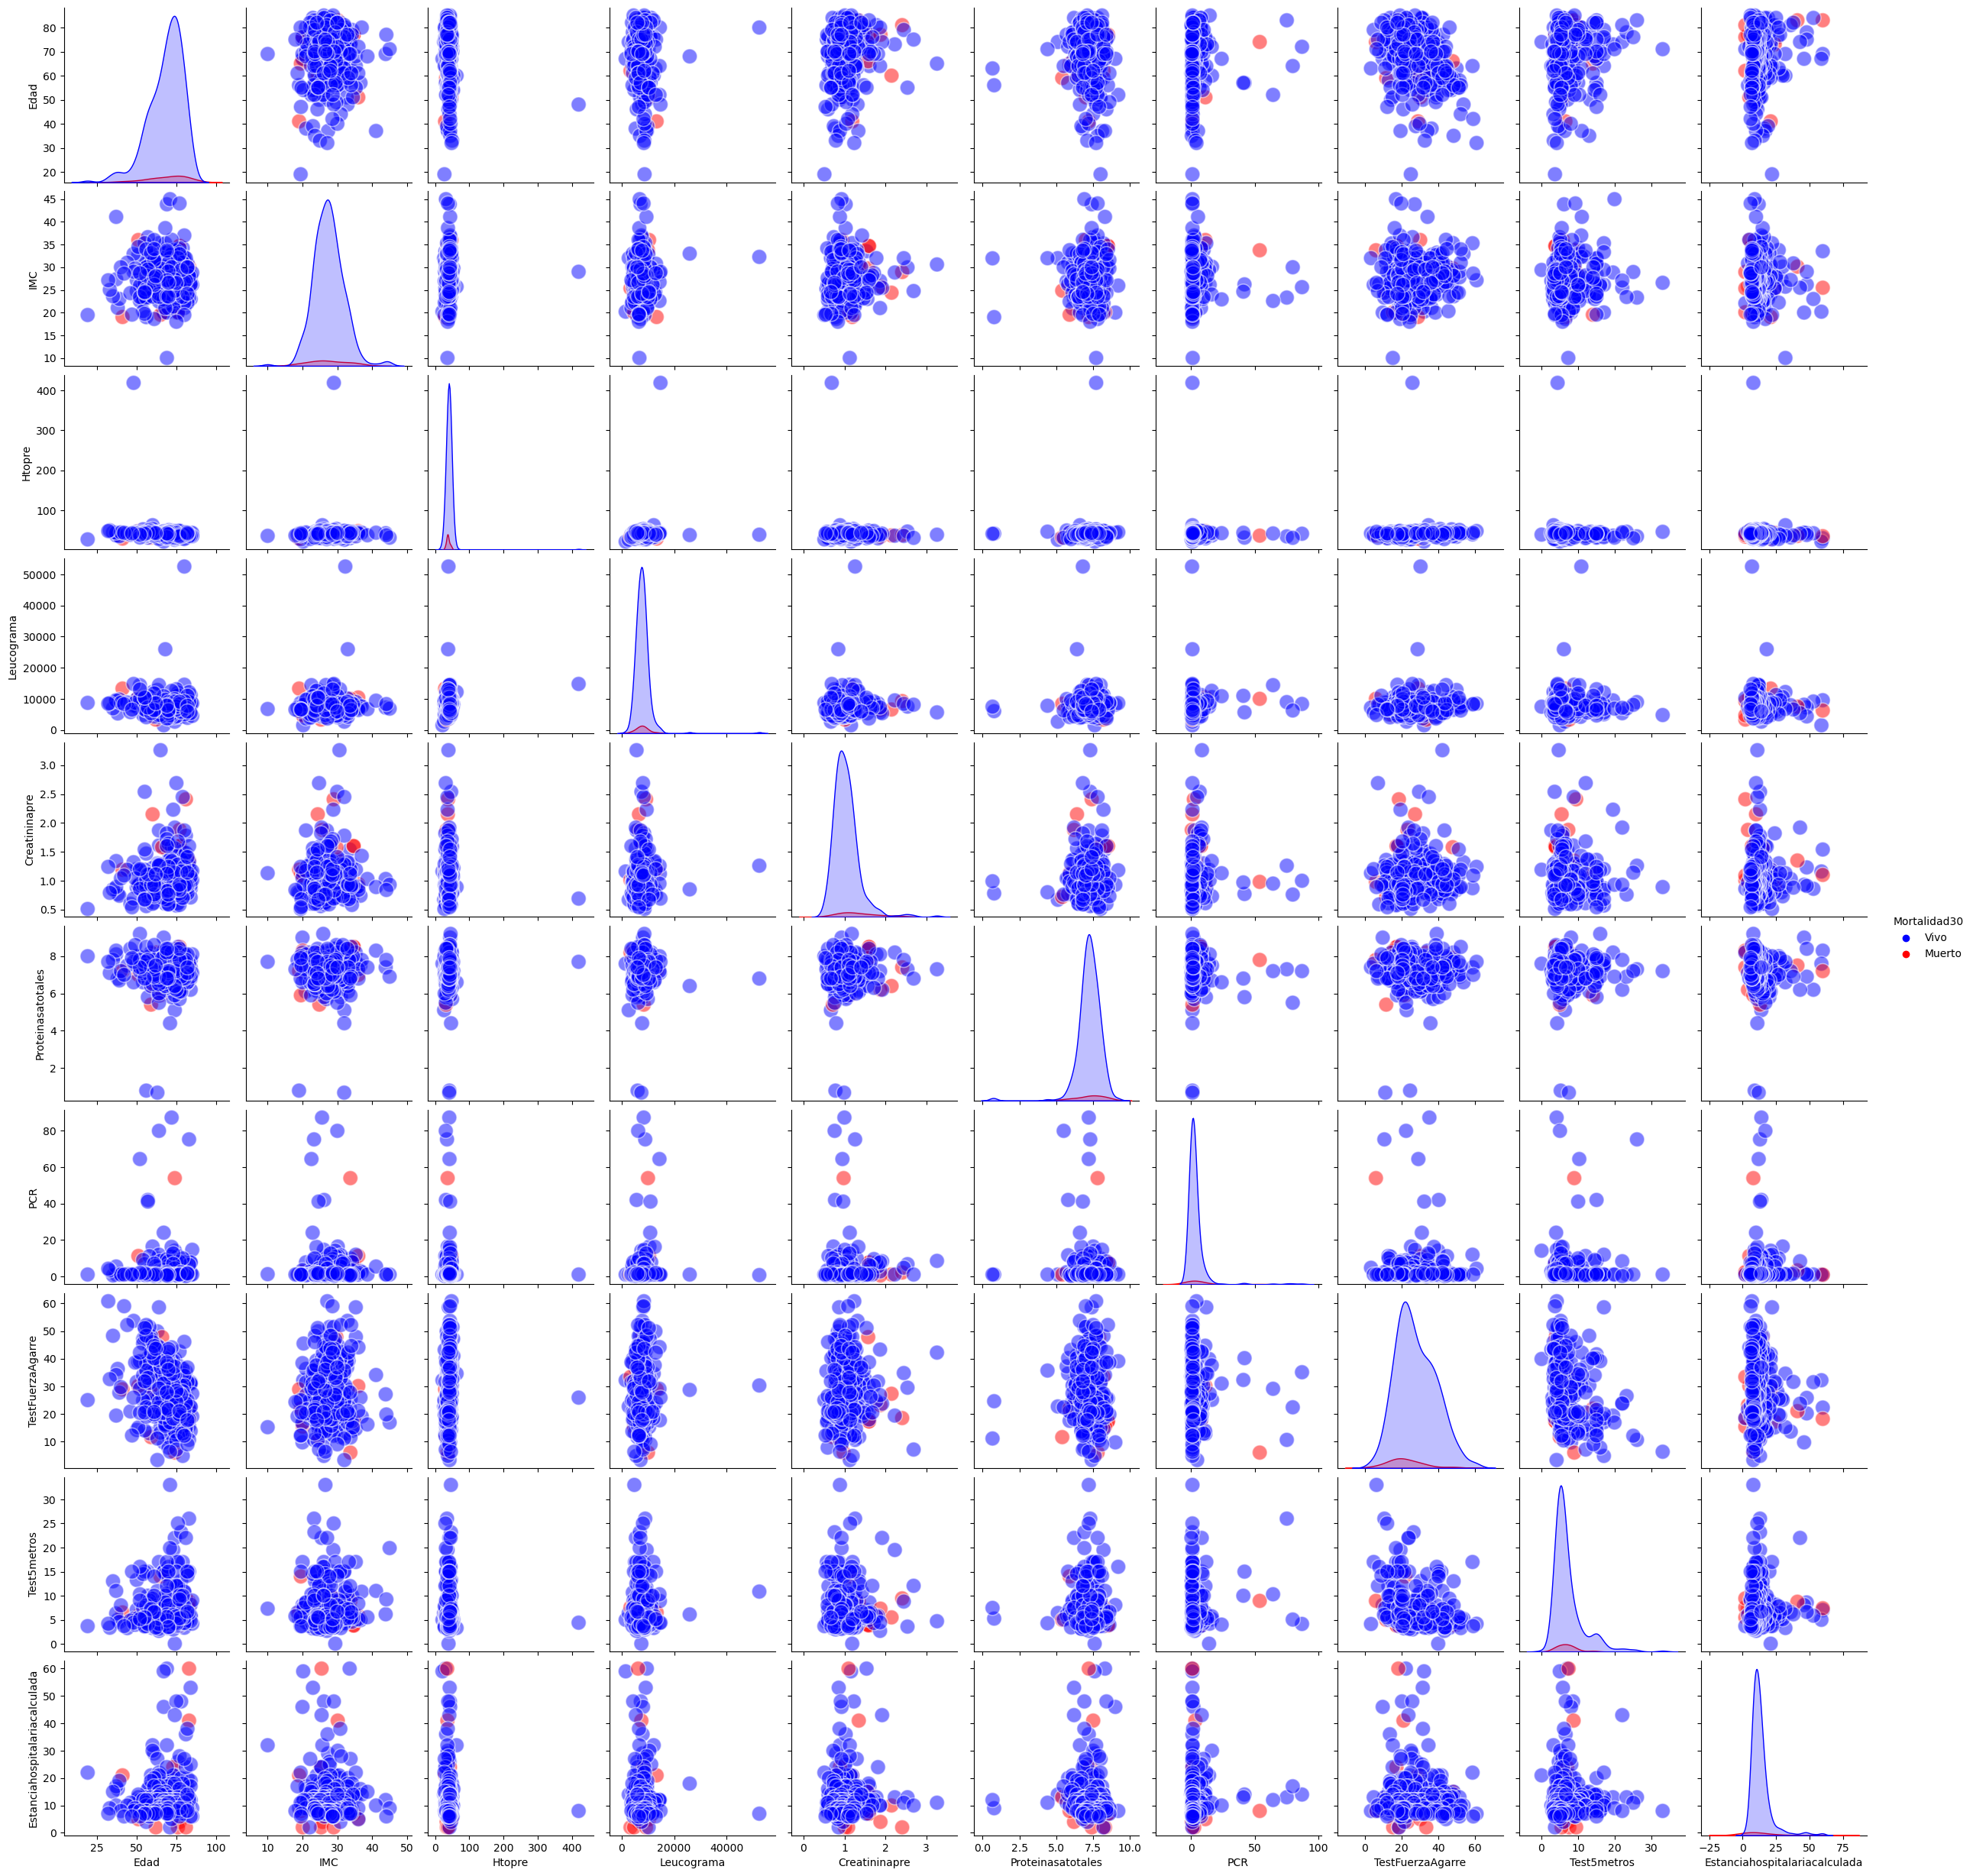

In [14]:
import seaborn as sns
import pandas as pd

# Mapear los valores de la columna 'Mortalidad30' a las etiquetas 'Vivo' y 'Muerto'
y_mapped = y.map({0: 'Vivo', 1: 'Muerto'})

# Crear el pairplot con colores personalizados
sns.pairplot(
    X_num.join(y_mapped.rename('Mortalidad30')),  # Renombrar la columna para mantener consistencia
    hue='Mortalidad30',
    palette={'Vivo': 'blue', 'Muerto': 'red'},
    plot_kws={'alpha': 0.5, 's': 200}
)

#### Breusch-Pagan

In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd
import numpy as np

# Asegúrate de que X y y estén definidos
# X: DataFrame con las variables independientes
# y: Serie o array con la variable dependiente

# Verificar y manejar valores faltantes o infinitos en X_num y y
X_num_clean = X_num.replace([np.inf, -np.inf], np.nan).dropna()  # Reemplazar inf por NaN y eliminar filas con NaN
y_clean = y.loc[X_num_clean.index]  # Asegurarse de que y esté alineado con X_num_clean

# Agregar una constante para el término independiente
X = sm.add_constant(X_num_clean)

# Ajustar un modelo de regresión lineal
model = sm.OLS(y_clean, X).fit()

# Obtener los residuos del modelo
residuals = model.resid

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)

# Extraer los resultados
bp_stat = bp_test[0]  # Estadístico de Breusch-Pagan
bp_p_value = bp_test[1]  # p-valor asociado

# Mostrar los resultados
print(f"Estadístico de Breusch-Pagan: {bp_stat}")
print(f"p-valor: {bp_p_value}")

if bp_p_value < 0.05:
    print("Rechazamos la hipótesis nula: No hay homocedasticidad (hay heterocedasticidad).")
else:
    print("No se rechaza la hipótesis nula: Hay homocedasticidad.")

Estadístico de Breusch-Pagan: 24.25932913768251
p-valor: 0.006941015309179744
Rechazamos la hipótesis nula: No hay homocedasticidad (hay heterocedasticidad).


#### Test de Levene

In [16]:
from scipy.stats import levene
import pandas as pd
import numpy as np

# Asegúrate de que X y y estén definidos
# X: DataFrame con las variables independientes
# y: Serie o array con la variable dependiente

# Verificar y manejar valores faltantes o infinitos en X_num y y
X_num_clean = X_num.replace([np.inf, -np.inf], np.nan).dropna()  # Reemplazar inf por NaN y eliminar filas con NaN
y_clean = y.loc[X_num_clean.index]  # Asegurarse de que y esté alineado con X_num_clean

# Realizar el test de Levene para cada variable en X_num_clean
for column in X_num_clean.columns:
    # Separar los datos en grupos según la variable dependiente (y_clean)
    group_0 = X_num_clean.loc[y_clean == 0, column]
    group_1 = X_num_clean.loc[y_clean == 1, column]
    
    # Realizar el test de Levene
    stat, p_value = levene(group_0, group_1)
    
    # Mostrar los resultados
    print(f"Variable: {column}")
    print(f"Estadístico de Levene: {stat}")
    print(f"p-valor: {p_value}")
    
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: No hay homocedasticidad (hay heterocedasticidad).")
    else:
        print("No se rechaza la hipótesis nula: Hay homocedasticidad.")
    print("-" * 50)

Variable: Edad
Estadístico de Levene: 0.4786584907321583
p-valor: 0.48952760512332294
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: IMC
Estadístico de Levene: 2.333921438855957
p-valor: 0.12756128063924999
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: Htopre
Estadístico de Levene: 0.0767563439349016
p-valor: 0.7819194278192431
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: Leucograma
Estadístico de Levene: 8.681300466624363e-05
p-valor: 0.9925716901373495
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: Creatininapre
Estadístico de Levene: 5.340544031399536
p-valor: 0.02146433557442456
Rechazamos la hipótesis nula: No hay homocedasticidad (hay heterocedasticidad).
--------------------------------------------------


## ANÁLISIS ESTADÍSTICO VARIABLES CATEGÓRICAS

### ANÁLISIS EXPLORATORIO (EDA)

#### DISTRIBUCIÓN VARIABLES

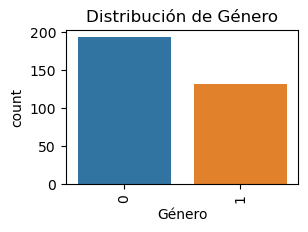

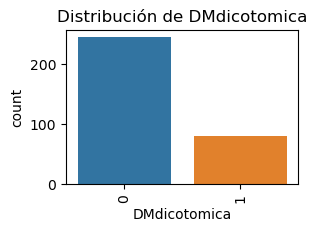

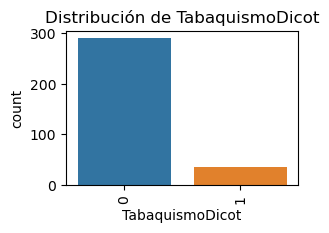

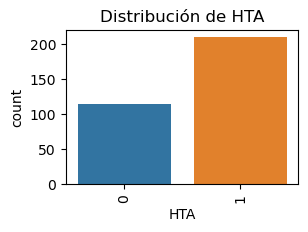

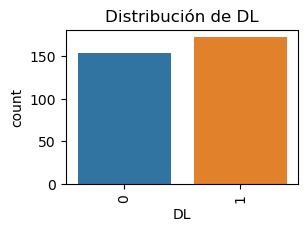

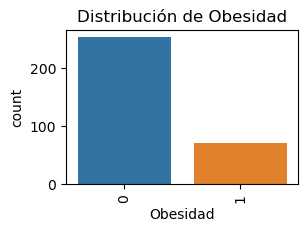

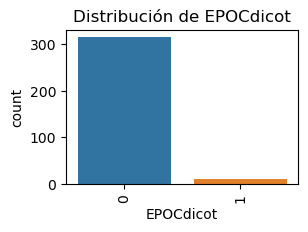

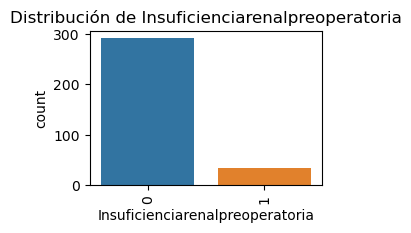

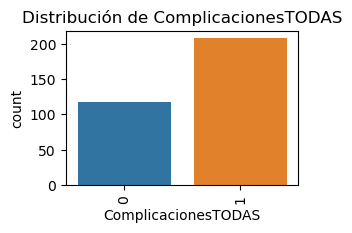

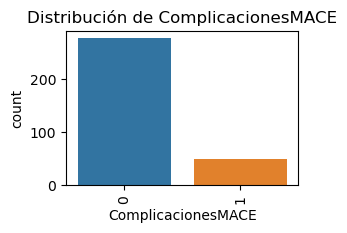

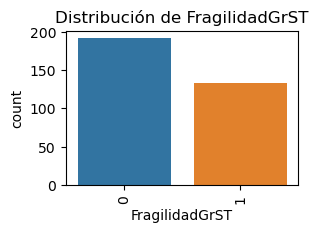

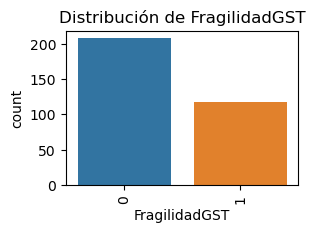

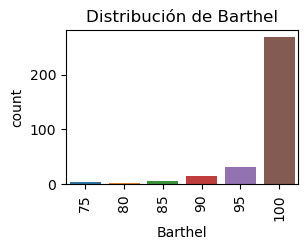

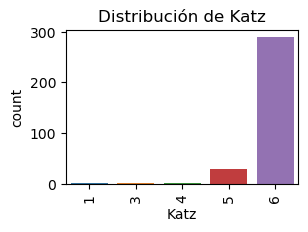

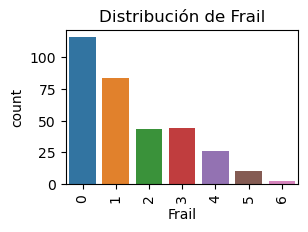

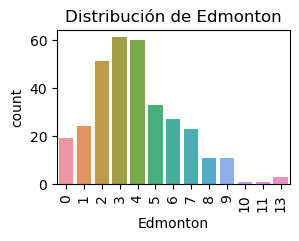

In [17]:
# Distribución de Variables Categóricas
for col in cols_cat:
    #print(X_cat[col].value_counts())
    plt.figure(figsize=(3, 2))
    sns.countplot(x=X_cat[col])
    plt.xticks(rotation=90)
    plt.title(f"Distribución de {col}")
    plt.show()

#### TABLA DE CONTINGENCIAS

Tabla de contingencia para Género:
Mortalidad30    0   1
Género               
0             187   6
1             122  10




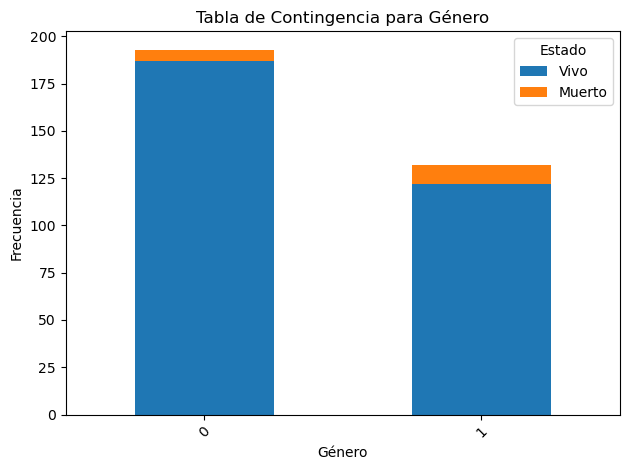

Tabla de contingencia para DMdicotomica:
Mortalidad30    0   1
DMdicotomica         
0             232  13
1              77   3




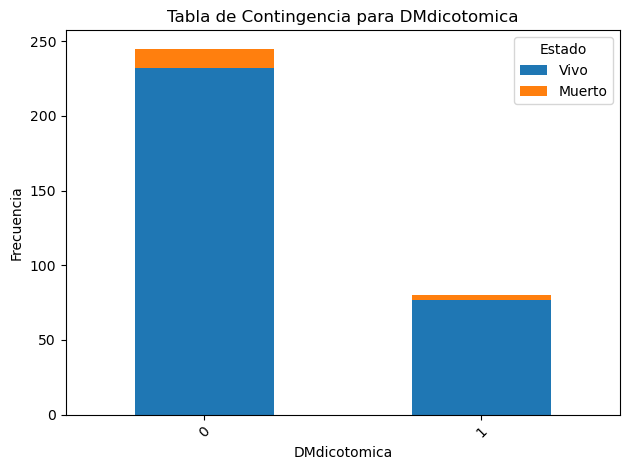

Tabla de contingencia para TabaquismoDicot:
Mortalidad30       0   1
TabaquismoDicot         
0                275  15
1                 34   1




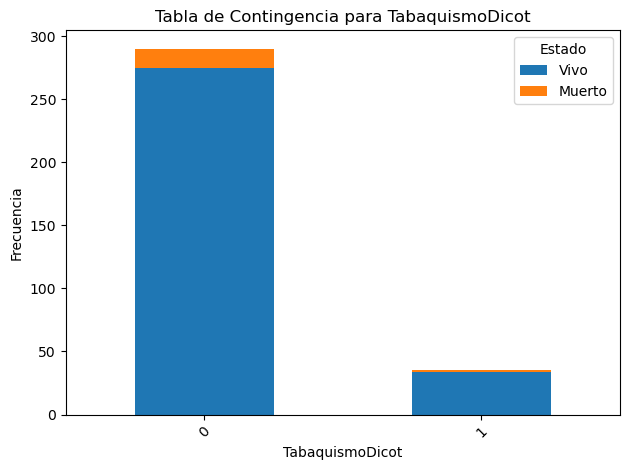

Tabla de contingencia para HTA:
Mortalidad30    0  1
HTA                 
0             108  7
1             201  9




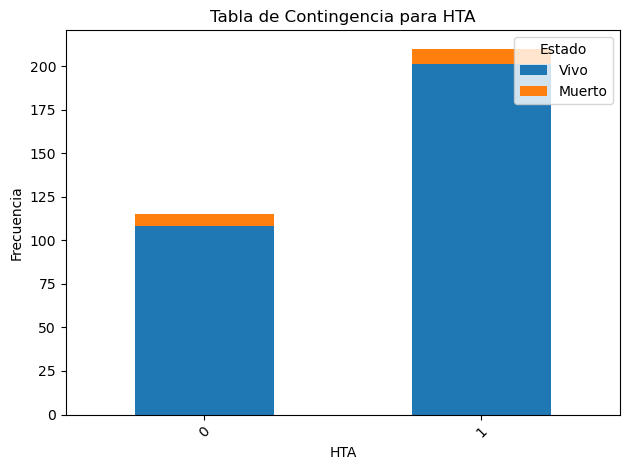

Tabla de contingencia para DL:
Mortalidad30    0  1
DL                  
0             146  7
1             163  9




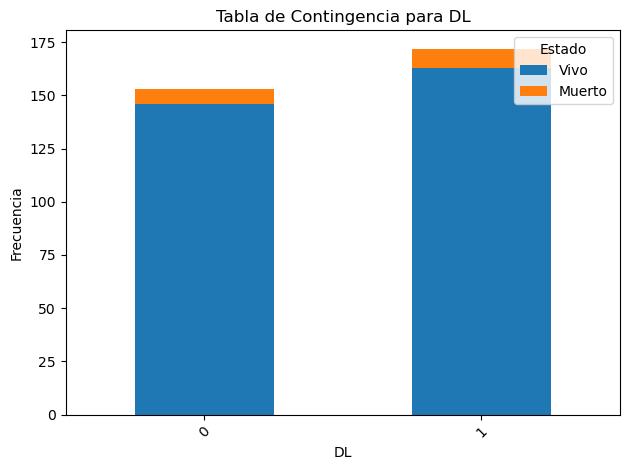

Tabla de contingencia para Obesidad:
Mortalidad30    0   1
Obesidad             
0             243  11
1              66   5




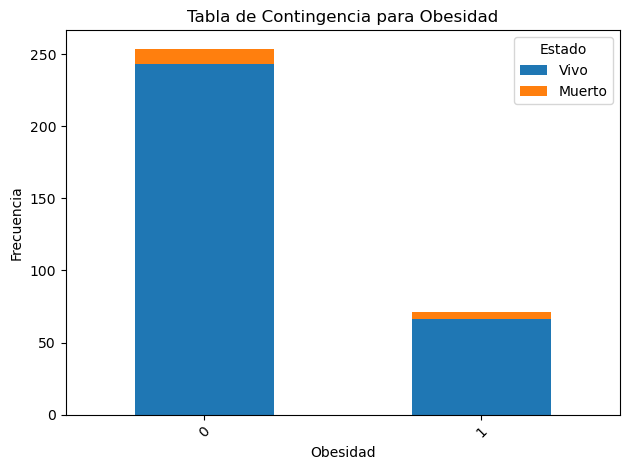

Tabla de contingencia para EPOCdicot:
Mortalidad30    0   1
EPOCdicot            
0             300  15
1               9   1




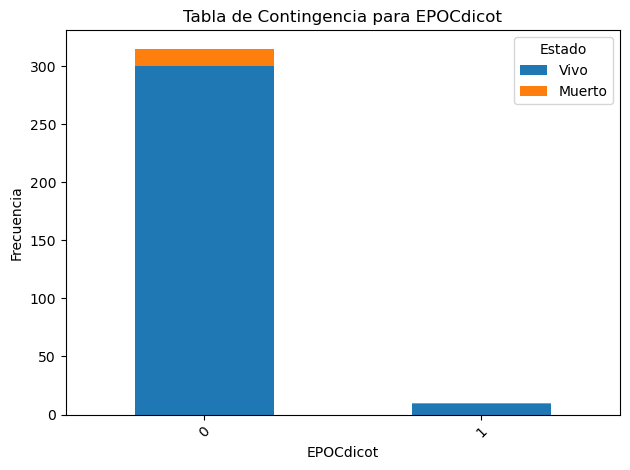

Tabla de contingencia para Insuficienciarenalpreoperatoria:
Mortalidad30                       0  1
Insuficienciarenalpreoperatoria        
0                                283  9
1                                 26  7




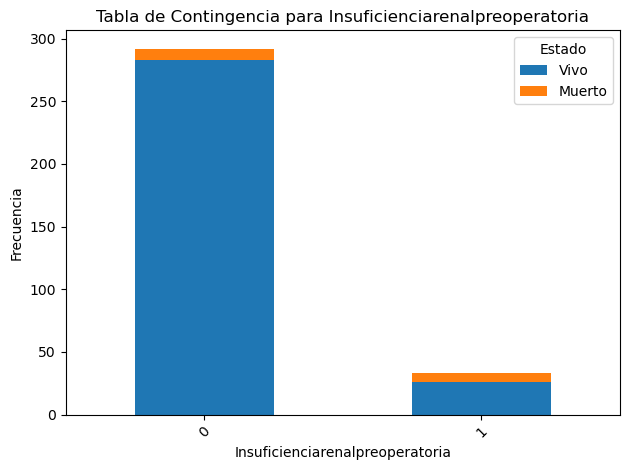

Tabla de contingencia para ComplicacionesTODAS:
Mortalidad30           0   1
ComplicacionesTODAS         
0                    117   0
1                    192  16




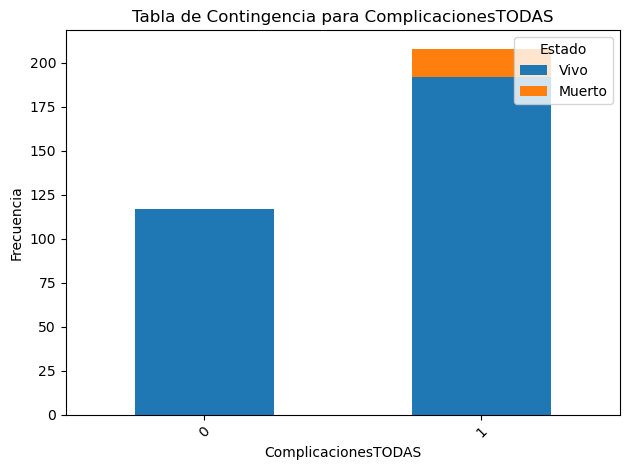

Tabla de contingencia para ComplicacionesMACE:
Mortalidad30          0   1
ComplicacionesMACE         
0                   276   0
1                    33  16




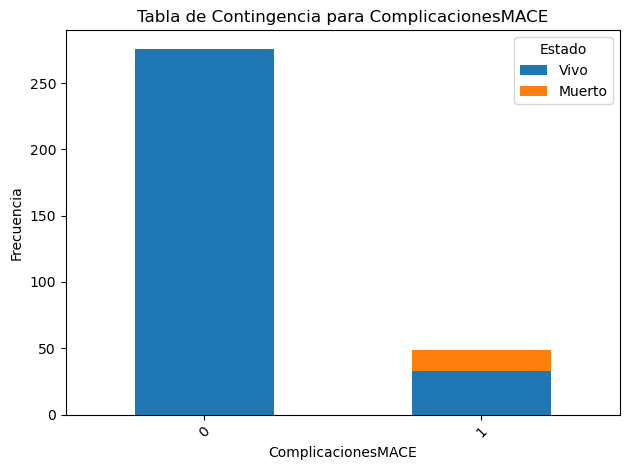

Tabla de contingencia para FragilidadGrST:
Mortalidad30      0   1
FragilidadGrST         
0               186   6
1               123  10




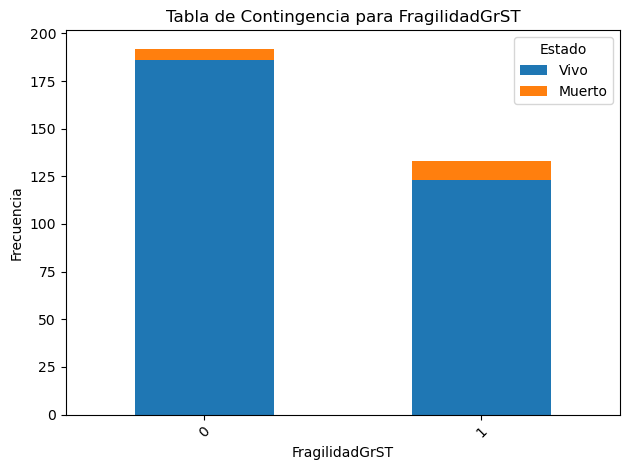

Tabla de contingencia para FragilidadGST:
Mortalidad30     0  1
FragilidadGST        
0              199  9
1              110  7




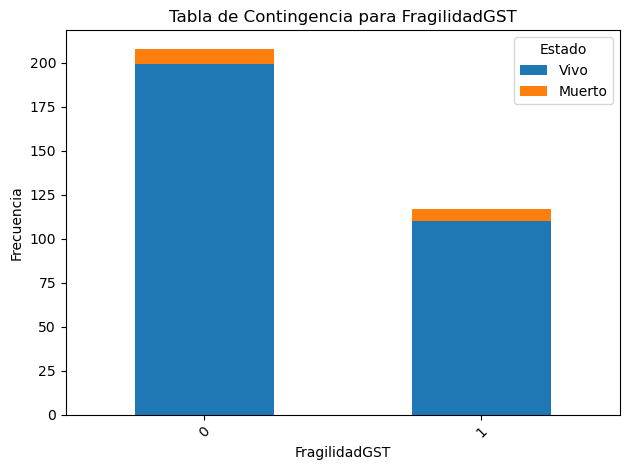

Tabla de contingencia para Barthel:
Mortalidad30    0  1
Barthel             
75              1  2
80              0  2
85              6  0
90             13  1
95             30  2
100           259  9




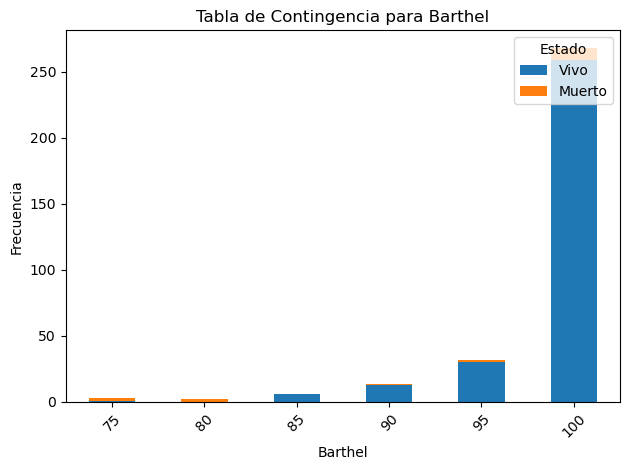

Tabla de contingencia para Katz:
Mortalidad30    0   1
Katz                 
1               2   0
3               0   2
4               2   0
5              28   2
6             277  12




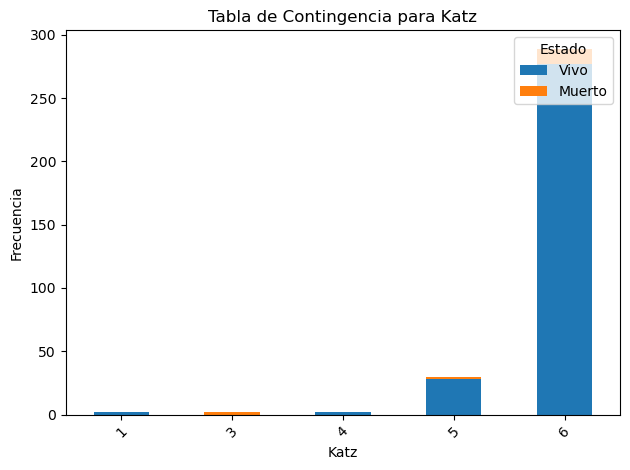

Tabla de contingencia para Frail:
Mortalidad30    0  1
Frail               
0             111  5
1              79  5
2              41  2
3              44  0
4              22  4
5              10  0
6               2  0




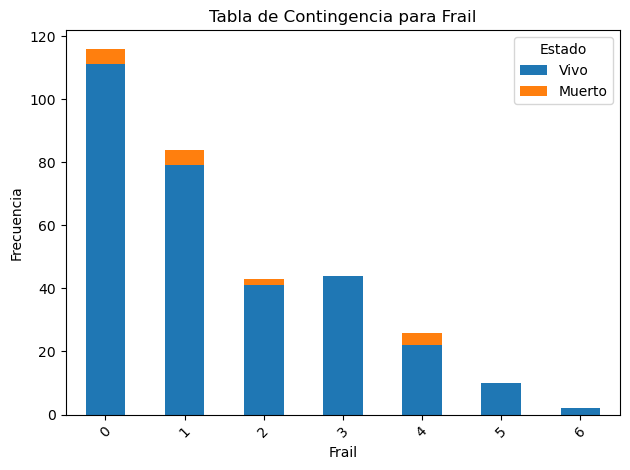

Tabla de contingencia para Edmonton:
Mortalidad30   0  1
Edmonton           
0             19  0
1             23  1
2             49  2
3             61  0
4             58  2
5             32  1
6             25  2
7             20  3
8             10  1
9              9  2
10             1  0
11             1  0
13             1  2




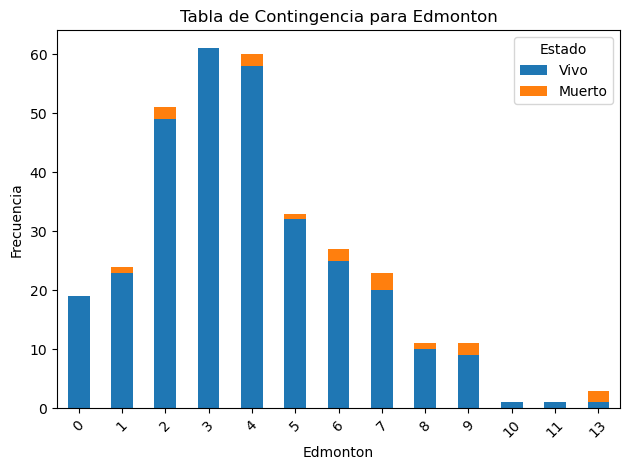

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

contingency_tables = {}
for col in cols_cat:
    contingency_table = pd.crosstab(X_cat[col], y)
    contingency_tables[col] = contingency_table

    print(f"Tabla de contingencia para {col}:")
    print(contingency_table)
    print("\n")

    # Renombrar las columnas de la tabla de contingencia para cambiar 0 -> Vivo y 1 -> Muerto
    contingency_table.columns = ["Vivo", "Muerto"]

    # Graficar la tabla de contingencia
    ax = contingency_table.plot(kind='bar', stacked=True)
    plt.title(f"Tabla de Contingencia para {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # Modificar etiquetas del eje X para mostrar "Vivo" y "Muerto"
    ax.set_xticklabels(contingency_table.index, rotation=45)

    # Modificar la leyenda para que muestre "Vivo" en lugar de 0 y "Muerto" en lugar de 1
    plt.legend(title="Estado", labels=["Vivo", "Muerto"], loc="upper right")

    plt.tight_layout()
    plt.show()

  #representa la tabla de contingencia como si fuese una matroz de confusion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




ComplicacionesMACE                 6.742790e-21
Barthel                            1.099815e-12
Katz                               5.776228e-08
Insuficienciarenalpreoperatoria    3.495354e-05
Edmonton                           1.831657e-04
ComplicacionesTODAS                4.960065e-03
Género                             1.171188e-01
FragilidadGrST                     1.236898e-01
Frail                              1.590088e-01
Obesidad                           5.330473e-01
HTA                                6.530108e-01
FragilidadGST                      6.926443e-01
DMdicotomica                       7.941162e-01
TabaquismoDicot                    8.536175e-01
DL                                 9.867596e-01
EPOCdicot                          9.908879e-01
dtype: float64


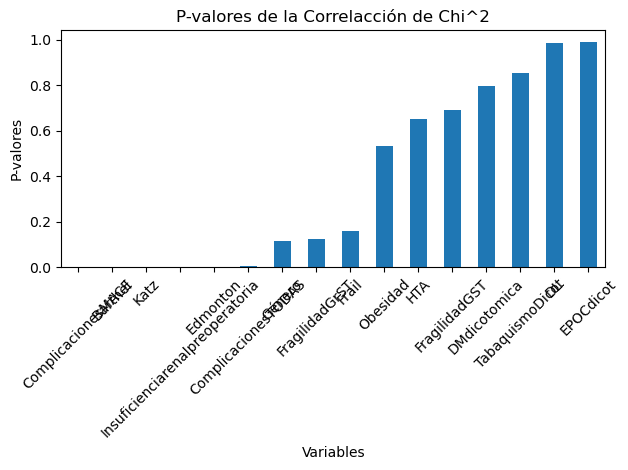

In [19]:
# Correlación variables categóricas con variable objetivo
from scipy.stats import chi2_contingency

pvalues = {}
for col in X_cat.columns:
    # Eliminar filas con valores faltantes en la columna actual o en y
    valid_data = X_cat[[col]].join(y).dropna()
    if len(valid_data) > 1:  # Asegurarse de que haya suficientes datos para calcular Pearson
        contingency_table = pd.crosstab(valid_data[col], valid_data['Mortalidad30'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        pvalues[col] = p
    else:
        pvalues[col] = np.nan  # Si no hay suficientes datos, asignar NaN

# Convertir a Series y ordenar
pvalues = pd.Series(pvalues)
pvalues = pvalues.sort_values(ascending=True)

print(pvalues)

# Graficar los p-valores
pvalues.plot(kind='bar')
plt.title('P-valores de la Correlacción de Chi^2')
plt.xlabel('Variables')
plt.ylabel('P-valores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

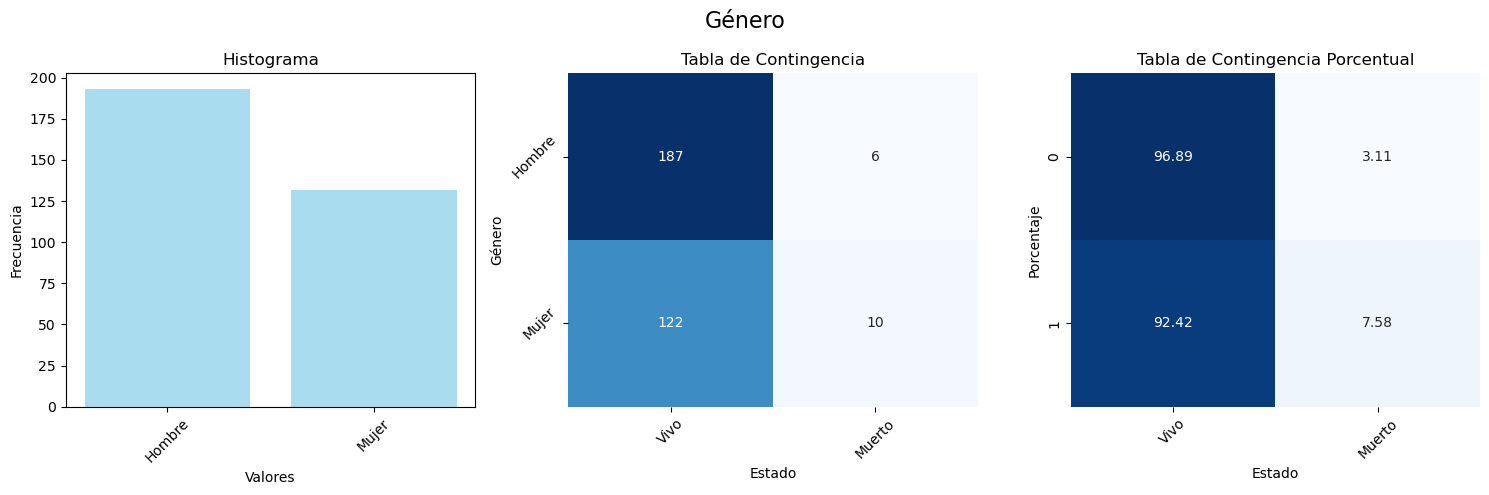

Clases madres detectadas:
Género
0    Vivo
1    Vivo
dtype: object


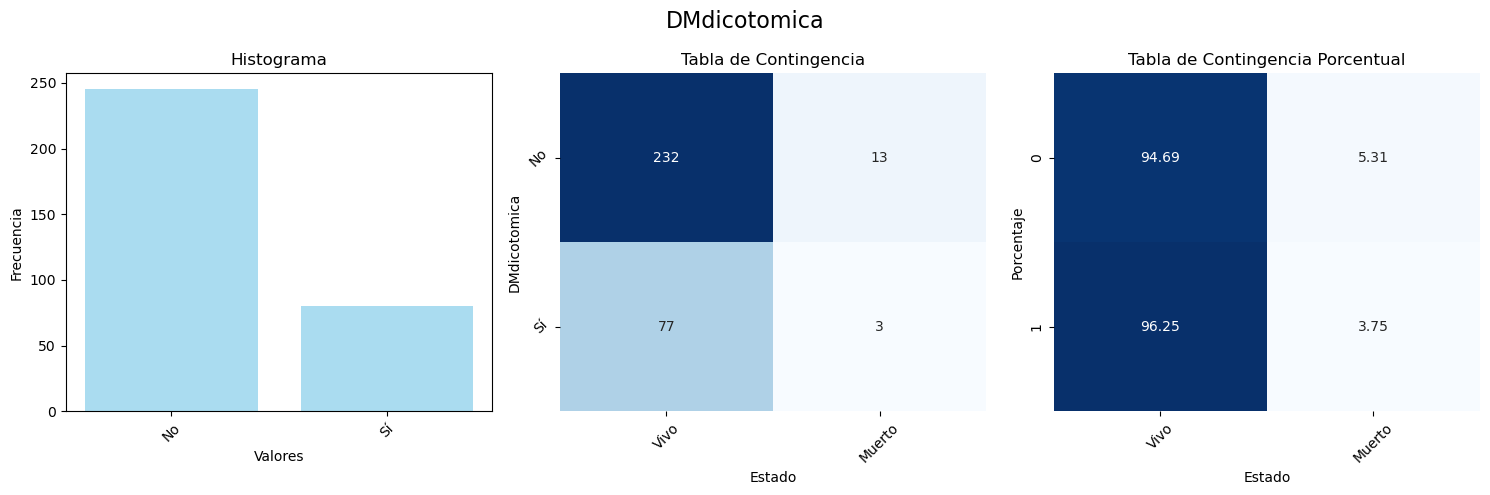

Clases madres detectadas:
DMdicotomica
0    Vivo
1    Vivo
dtype: object


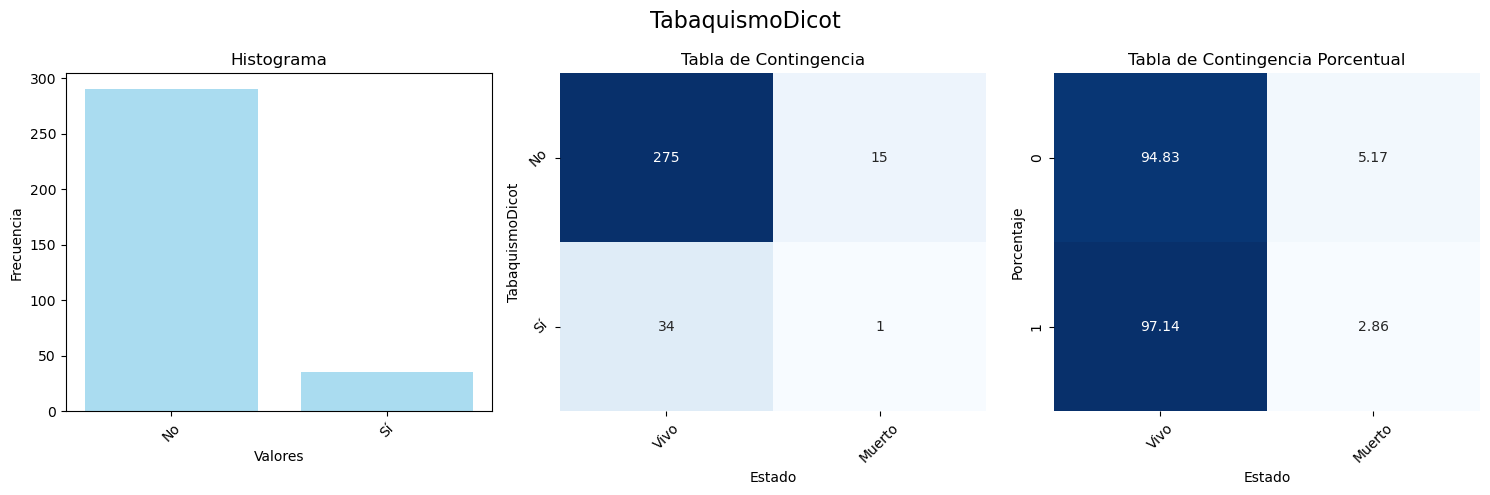

Clases madres detectadas:
TabaquismoDicot
0    Vivo
1    Vivo
dtype: object


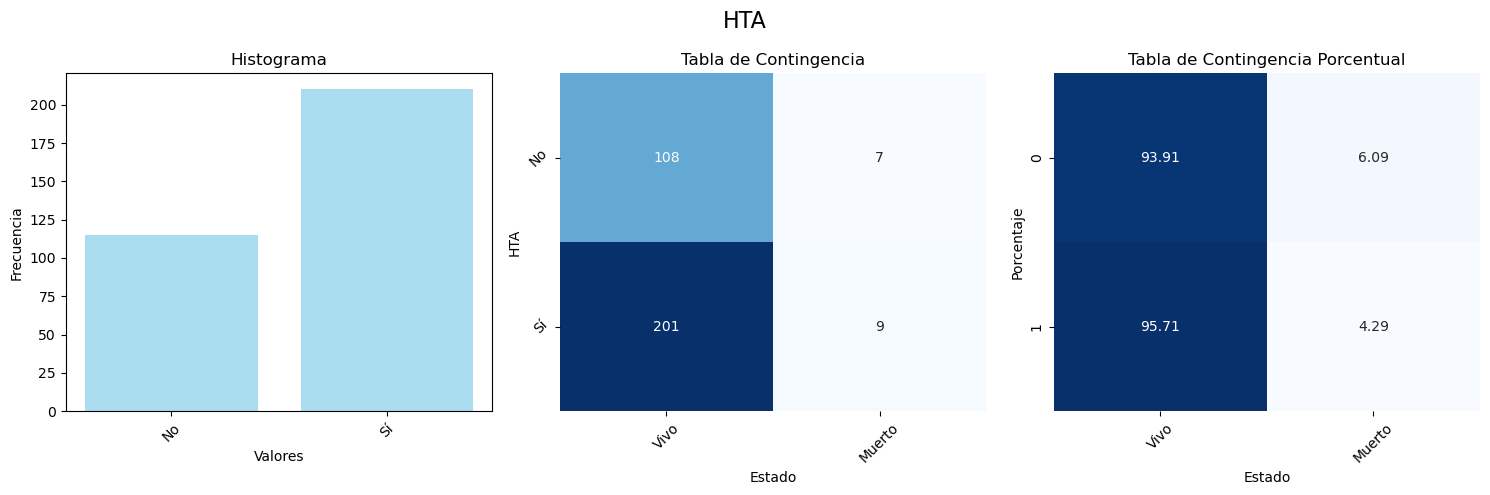

Clases madres detectadas:
HTA
0    Vivo
1    Vivo
dtype: object


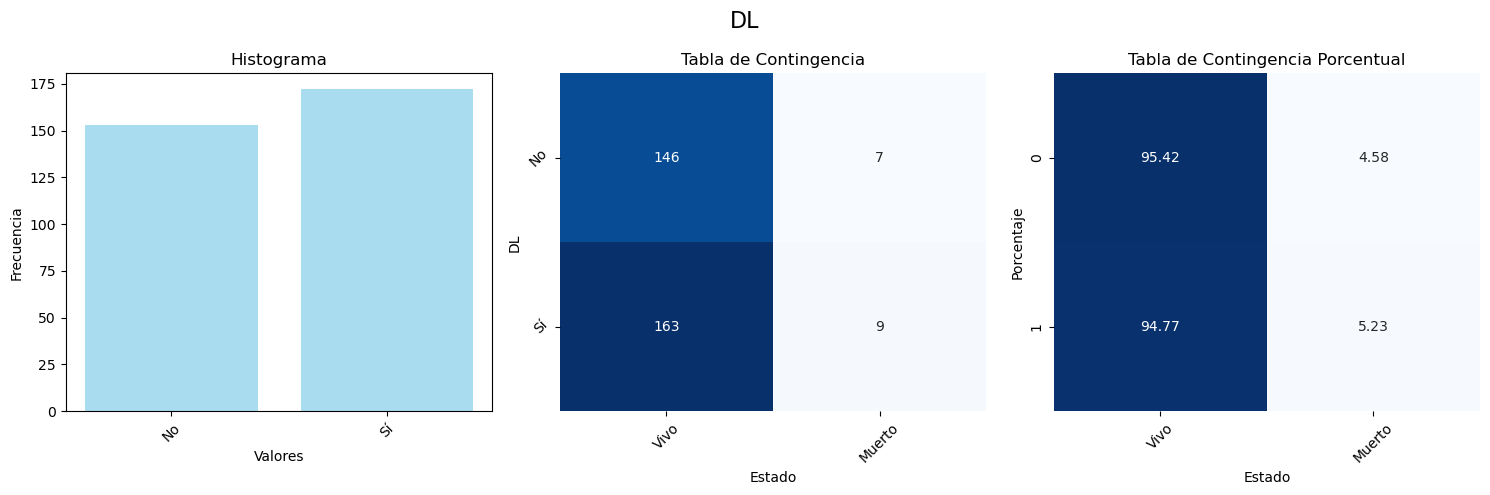

Clases madres detectadas:
DL
0    Vivo
1    Vivo
dtype: object


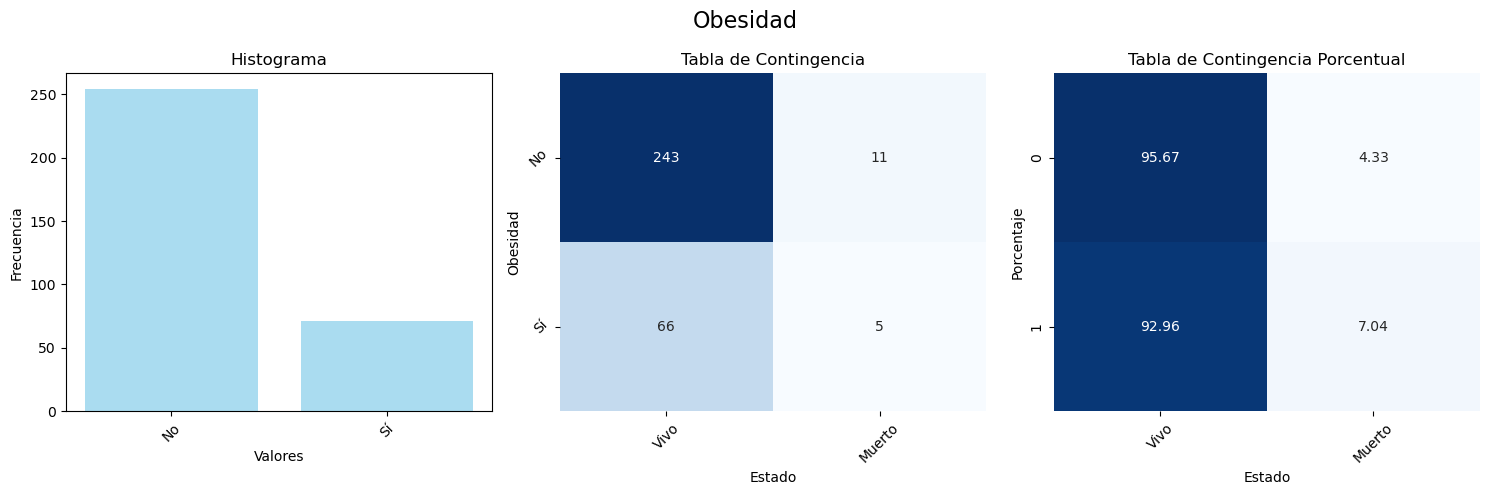

Clases madres detectadas:
Obesidad
0    Vivo
1    Vivo
dtype: object


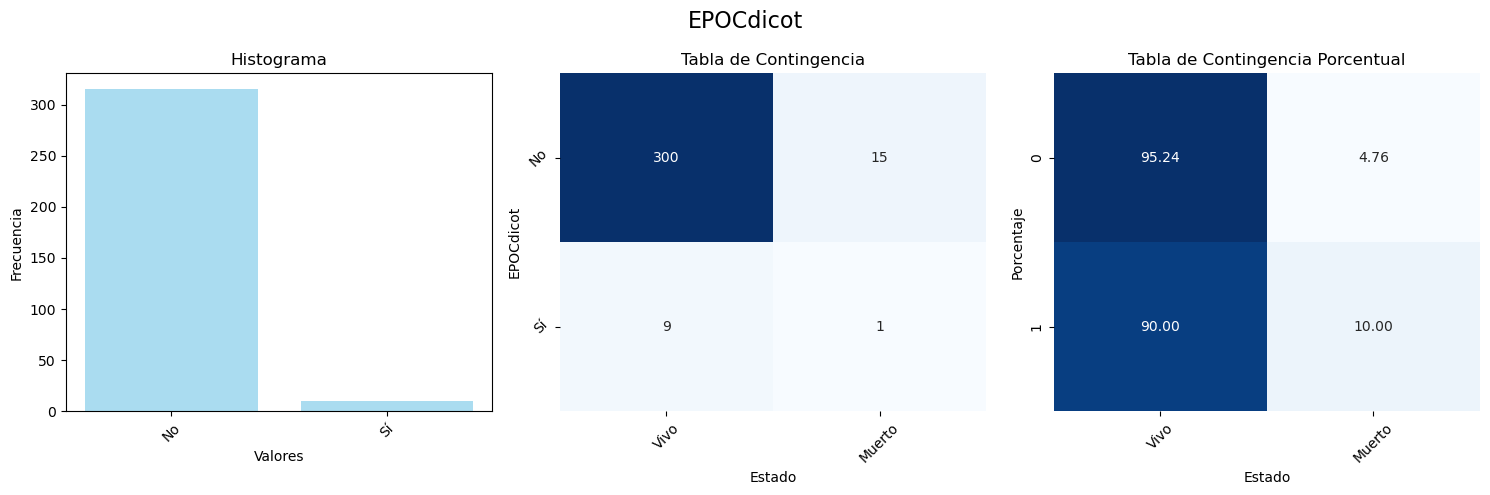

Clases madres detectadas:
EPOCdicot
0    Vivo
1    Vivo
dtype: object


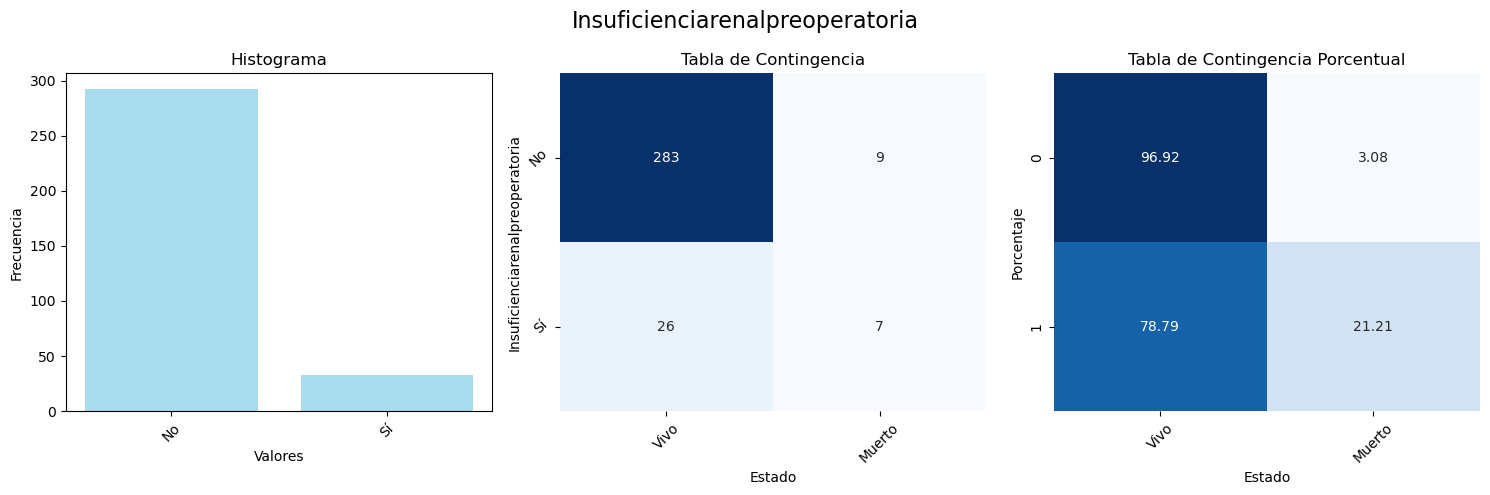

Clases madres detectadas:
Insuficienciarenalpreoperatoria
0    Vivo
1    Vivo
dtype: object


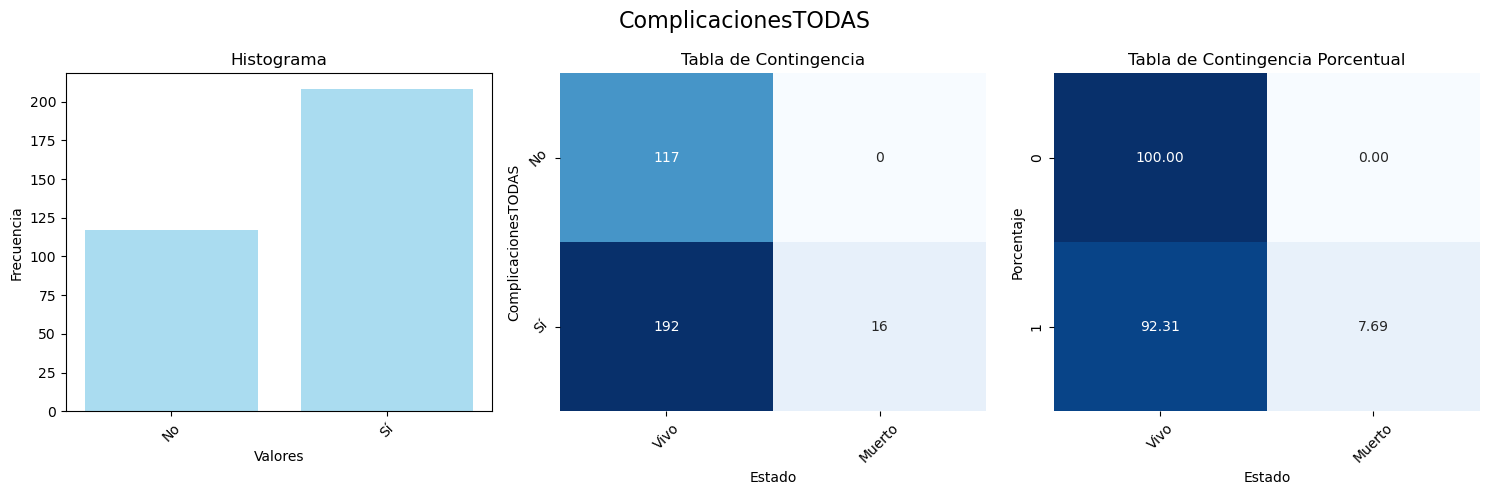

Clases madres detectadas:
ComplicacionesTODAS
0    Vivo
1    Vivo
dtype: object


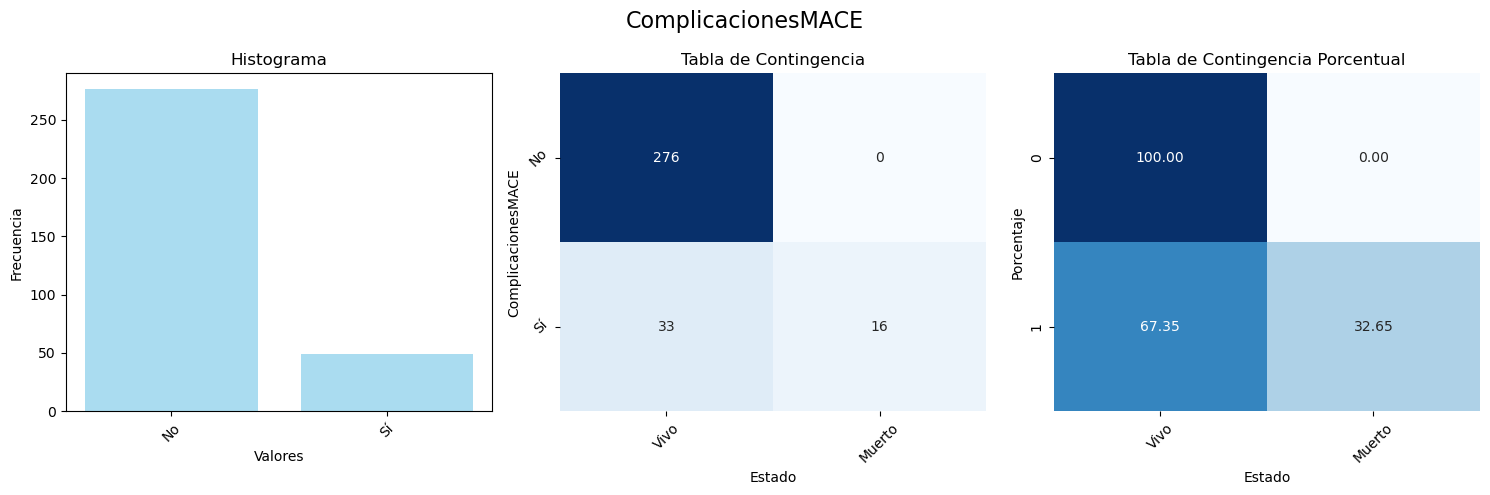

Clases madres detectadas:
ComplicacionesMACE
0    Vivo
1    Vivo
dtype: object


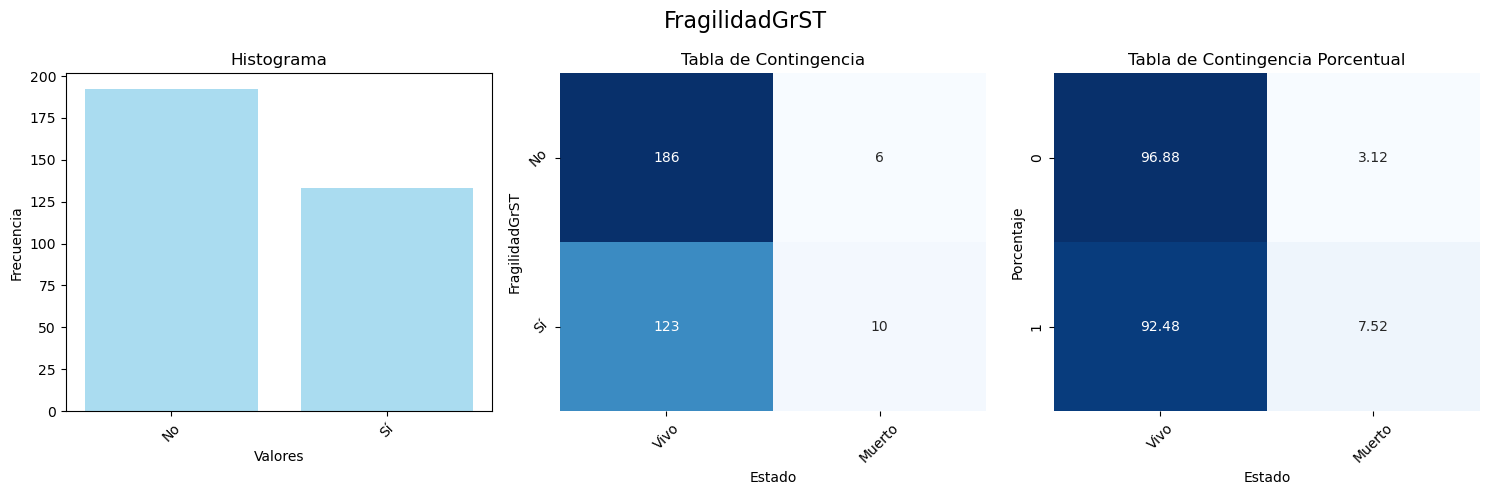

Clases madres detectadas:
FragilidadGrST
0    Vivo
1    Vivo
dtype: object


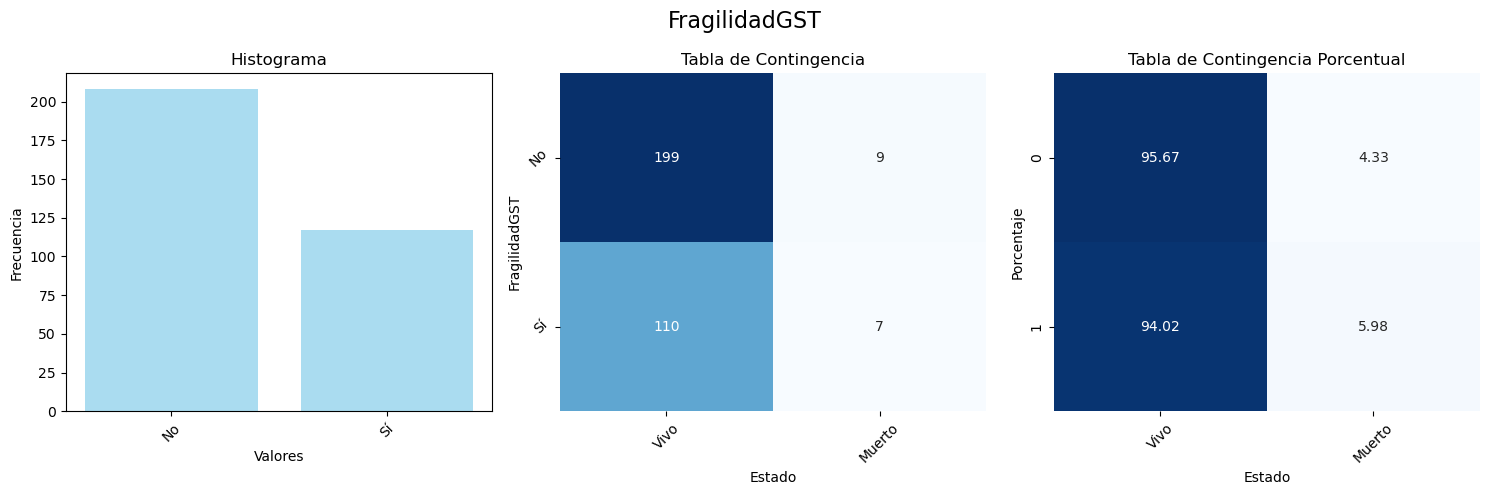

Clases madres detectadas:
FragilidadGST
0    Vivo
1    Vivo
dtype: object


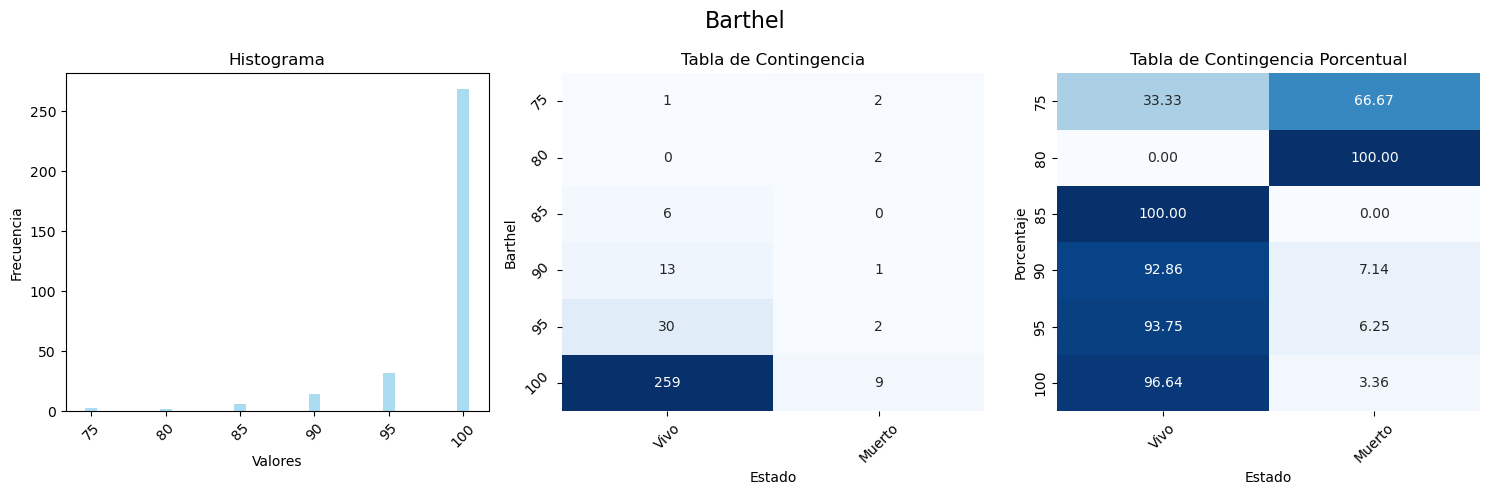

Clases madres detectadas:
Barthel
75     Muerto
80     Muerto
85       Vivo
90       Vivo
95       Vivo
100      Vivo
dtype: object


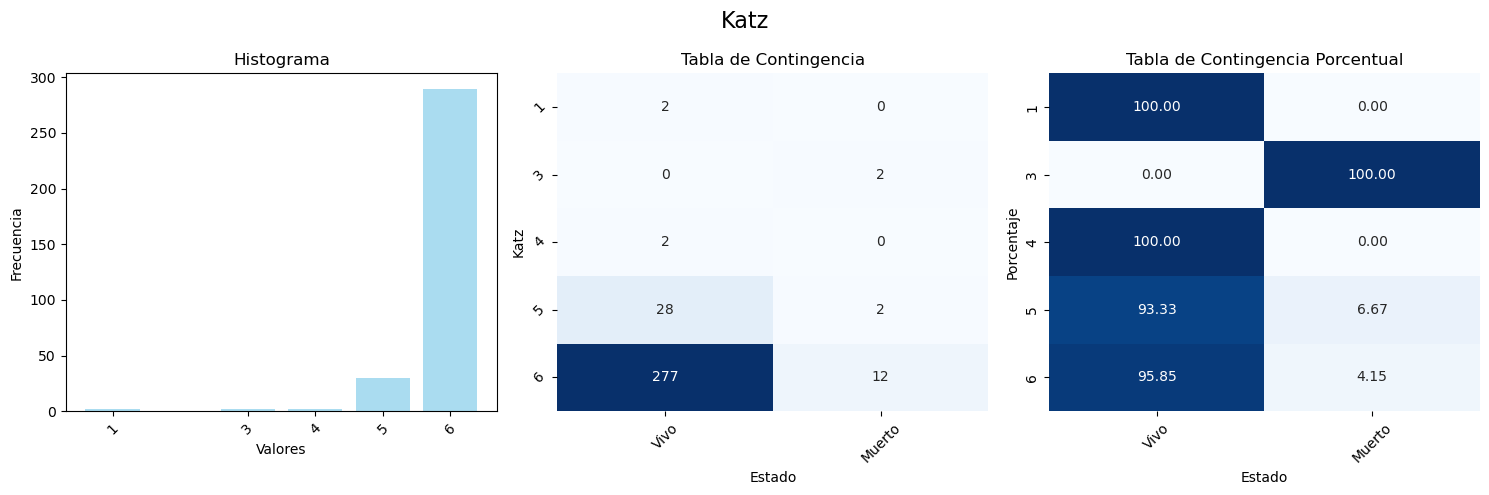

Clases madres detectadas:
Katz
1      Vivo
3    Muerto
4      Vivo
5      Vivo
6      Vivo
dtype: object


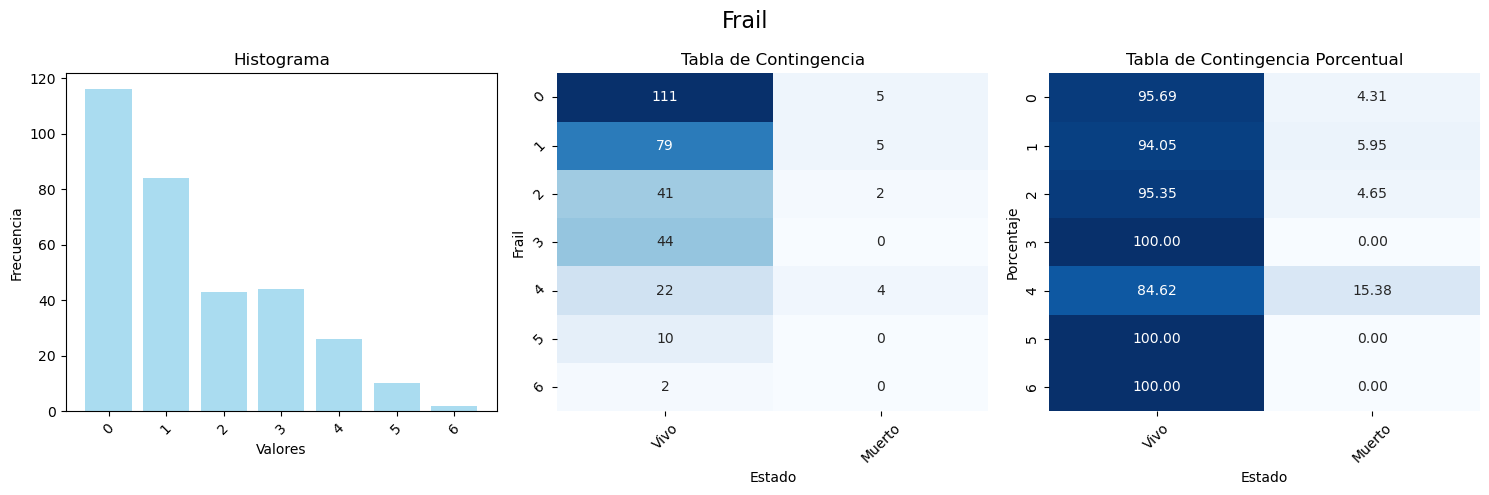

Clases madres detectadas:
Frail
0    Vivo
1    Vivo
2    Vivo
3    Vivo
4    Vivo
5    Vivo
6    Vivo
dtype: object


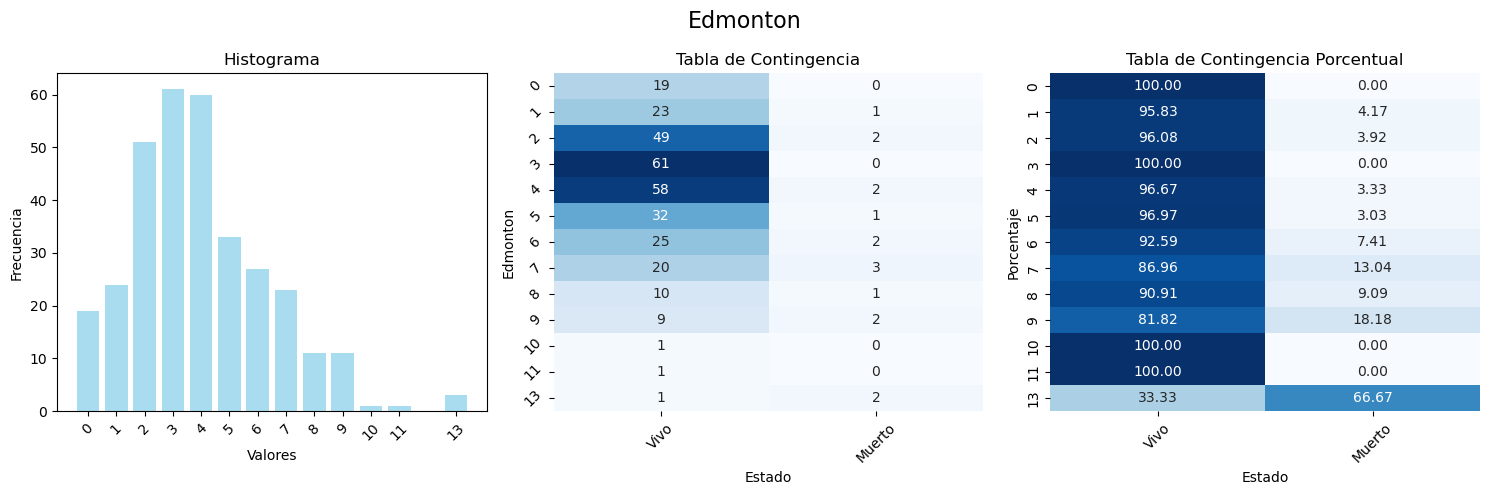

Clases madres detectadas:
Edmonton
0       Vivo
1       Vivo
2       Vivo
3       Vivo
4       Vivo
5       Vivo
6       Vivo
7       Vivo
8       Vivo
9       Vivo
10      Vivo
11      Vivo
13    Muerto
dtype: object


In [20]:
# Distribucón + Tabla de Contingencia
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


for col in cols_cat:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
    # Definir título de la figura
    fig.suptitle(f'{col}', fontsize=16)

    #Histograma a la izquierda
    u, counts = np.unique(X_cat[col].dropna(), return_counts=True)
    ax[0].bar(u, counts, color='skyblue', alpha=0.7)
    ax[0].set_title(f'Histograma')
    ax[0].set_xlabel('Valores')
    ax[0].set_ylabel('Frecuencia')
    ax[0].set_xticks(u)
    #ax[0].set_xticklabels([cat_classes[col][i] for i in u], rotation=45)
     # Manejo de excepción: si la columna está en cat_classes, usa los nombres, si no, usa los valores originales
    try:
        ax[0].set_xticklabels([cat_classes[col][i] for i in u], rotation=45)
    except KeyError:
        ax[0].set_xticklabels(u, rotation=45)  # Usa los valores originales si no están en cat_classes


    # Tabla de contingencia absoluta (central)
    contingency_table = pd.crosstab(X_cat[col], y)
    contingency_table.columns = ["Vivo", "Muerto"]
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=False)
    ax[1].set_title(f'Tabla de Contingencia')
    ax[1].set_xlabel('Estado')
    ax[1].set_ylabel(col)
    ax[1].set_xticklabels(["Vivo", "Muerto"], rotation=45)
    #ax[1].set_yticklabels([cat_classes[col][i] for i in contingency_table.index], rotation=0)
     # Manejo de excepción: si la columna está en cat_classes, usa los nombres, si no, usa los valores originales
    try:
        ax[1].set_yticklabels([cat_classes[col][i] for i in u], rotation=45)
    except KeyError:
        ax[1].set_yticklabels(u, rotation=45)  # Usa los valores originales si no están en cat_classes

    

    # Tabla de contingencia porcentual (derecha)
    contingency_table_percentage = pd.crosstab(X_cat[col], y, normalize='index') * 100
    contingency_table_percentage = contingency_table_percentage.round(2)
    contingency_table_percentage.columns = ["Vivo", "Muerto"]
    sns.heatmap(contingency_table_percentage, annot=True, fmt='.2f', cmap='Blues', ax=ax[2], cbar=False)
    ax[2].set_title(f'Tabla de Contingencia Porcentual')
    ax[2].set_xlabel('Estado')
    ax[2].set_ylabel('Porcentaje')
    ax[2].set_xticklabels(["Vivo", "Muerto"], rotation=45)  

    plt.tight_layout()
    plt.show()

    # Definir umbral para clase madre (80%)
    threshold = 0.8

    # Encontrar las clases madres en cada grupo
    class_mothers = contingency_table.idxmax(axis=1)  # Encuentra la clase con mayor frecuencia en cada categoría
    dominance = contingency_table.max(axis=1)  # Encuentra el valor máximo en cada fila

    # Filtrar las clases madres según el umbral
    class_mothers_filtered = class_mothers[dominance > threshold]

    # Mostrar resultados
    print("Clases madres detectadas:")
    print(class_mothers_filtered)







### ANÁLISIS DE HOMOCEDASTICIDAD

In [21]:
from scipy.stats import levene
import pandas as pd
import numpy as np

# Asegúrate de que X_cat y y estén definidos
# X_cat: DataFrame con las variables categóricas
# y: Serie o array con la variable dependiente

# Verificar y manejar valores faltantes o infinitos en X_cat y y
X_cat_clean = X_cat.replace([np.inf, -np.inf], np.nan).dropna()  # Reemplazar inf por NaN y eliminar filas con NaN
y_clean = y.loc[X_cat_clean.index]  # Asegurarse de que y esté alineado con X_cat_clean

# Convertir las variables categóricas a valores numéricos
X_cat_encoded = X_cat_clean.apply(lambda col: pd.factorize(col)[0])

# Realizar el test de Levene para cada variable en X_cat_encoded
for column in X_cat_encoded.columns:
    # Separar los datos en grupos según la variable dependiente (y_clean)
    group_0 = X_cat_encoded.loc[y_clean == 0, column]
    group_1 = X_cat_encoded.loc[y_clean == 1, column]
    
    # Realizar el test de Levene
    stat, p_value = levene(group_0, group_1)
    
    # Mostrar los resultados
    print(f"Variable: {column}")
    print(f"Estadístico de Levene: {stat}")
    print(f"p-valor: {p_value}")
    
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: No hay homocedasticidad (hay heterocedasticidad).")
    else:
        print("No se rechaza la hipótesis nula: Hay homocedasticidad.")
    print("-" * 50)

Variable: Género
Estadístico de Levene: 0.02488476098262203
p-valor: 0.8747531223372362
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: DMdicotomica
Estadístico de Levene: 0.3103736079279513
p-valor: 0.5778368469691966
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: TabaquismoDicot
Estadístico de Levene: 0.355854078815793
p-valor: 0.5512356929827298
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: HTA
Estadístico de Levene: 0.5127129280975434
p-valor: 0.4744841442379335
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: DL
Estadístico de Levene: 0.07431839179097663
p-valor: 0.7853241483340601
No se rechaza la hipótesis nula: Hay homocedasticidad.
--------------------------------------------------
Variable: Obesidad
Estadís

## ANÁLISIS ESTADÍSTICO VARIABLE OBJETIVO

### ANÁLISIS EXPLORATORIO (EDA)

#### HISTOGRAMAS

{'whiskers': [<matplotlib.lines.Line2D at 0x319f91ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x319f93890>,
 'boxes': [<matplotlib.patches.PathPatch at 0x319f36f10>],
 'medians': [<matplotlib.lines.Line2D at 0x319fa0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x319fa1a10>],
 'means': []}

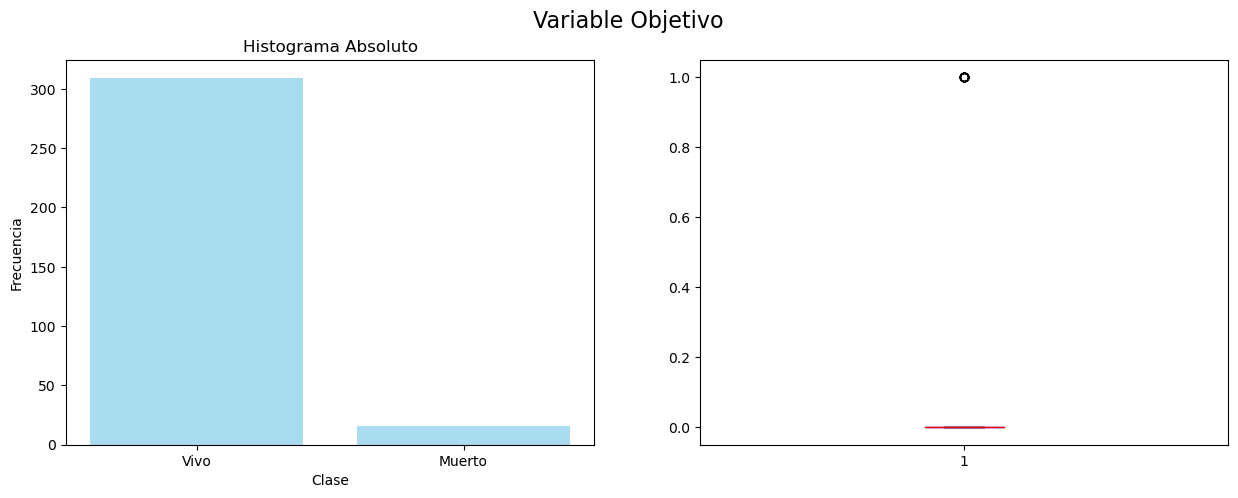

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  
fig.suptitle('Variable Objetivo', fontsize=16)

# Histograma Absoluto
ax[0].hist(y.dropna(), bins=[-0.5, 0.5, 1.5], color='skyblue', alpha=0.7, rwidth=0.8)
ax[0].set_xticks([0, 1])  # Etiquetas para las clases
ax[0].set_xticklabels(['Vivo', 'Muerto'])
ax[0].set_title('Histograma Absoluto')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Frecuencia')

#Histograma porcentual
ax[1].boxplot(y.dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))

